<a href="https://colab.research.google.com/github/AndoniFikri/CreditPrediction/blob/main/Final_Project_Andoni_Fikri_Oktaviano_Home_Credit_Data_Set_(Feature_Selection_%26_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#Import Data Set 

This project was one of my project during my virtual intern at Home Credit Indonesia. I choose this data set because it is the real world problem and it consist a lot of data. This time I was trying to predict wether the customer will be given the credit or not.

The data set could be access through this link : `https://www.kaggle.com/competitions/home-credit-default-risk/overview`

The main objective of this project is to build a model that is capable to predict which customer will be lended the credit and which not. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Set/application_train.csv')

In [ ]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
df.info(verbose=True,null_counts=True)
pd.options.display.max_rows=None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
#categorical column
categorical = df.select_dtypes('object').columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
#numeric table column name
numeric = df.select_dtypes([np.number]).columns
numeric

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
#Describe for numerical value
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
df[categorical].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

#Data Preprocessing


##Check for Missing Values and Duplicated Row




In [ ]:
#Check Missing Value (Percentage)
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [ ]:
#Check for Duplicated Row
df.duplicated().sum()

0

Conclusion : There are missing value in the data set but there is no duplicated data.

##Filling/Manipulating Missing Value 

###Investigating Missing Value

`SK_ID_CURR` should be dropped since it has no means for the modelling. 

In [ ]:
df = df.drop('SK_ID_CURR', axis =1)

In [ ]:
df['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

Because `APARTMENTS_AVG`until `EMERGENCYSTATE_MODE` columns have a lot of missing value, thus we shall see the connection between `NAME_HOUSING_TYPE` with this column to see what action should be done to fill this missing value.

In [ ]:
#Since we would like to see APARTMENTS_AVG correlation, thus filtering the data with other housing type other than apartment is neccesarry 
df_with_parents = df[df['NAME_HOUSING_TYPE'] =='With parents']
df_with_parents.shape

(14840, 121)

In [ ]:
columns_name = df.columns.tolist()
columns_name

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [ ]:
df_with_parents[columns_name[43:90]].describe()

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count     6324.000000       5413.000000                  6619.000000   
mean         0.115762          0.089805                     0.978446   
std          0.105333          0.079916                     0.055328   
min          0.000000          0.000000                     0.000000   
25%          0.058800          0.046900                     0.977100   
50%          0.088700          0.078100                     0.982600   
75%          0.146400          0.113000                     0.987100   
max          1.000000          1.000000                     1.000000   

       YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
count      4405.000000     3950.000000    6005.000000    6391.000000   
mean          0.758511        0.046259       0.077899       0.151995   
std           0.103024        0.078434       0.129834       0.101500   
min           0.150000        0.000000       0.000000       0.000000   
25%           0.700800        0.008000       0.000000       0.080300   
50%           0.768800        0.022400       0.000000       0.137900   
75%           0.823200        0.052675       0.120000       0.206900   
max           1.000000        1.000000       1.000000       1.000000   

       FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
count    6466.000000    4208.000000   5331.000000           4180.000000   
mean        0.223796       0.230346      0.068237              0.100582   
std         0.139136       0.159364      0.082148              0.089361   
min         0.000000       0.000000      0.000000              0.000000   
25%         0.166700       0.083300      0.019750              0.050400   
50%         0.166700       0.208300      0.048700              0.075600   
75%         0.333300       0.375000      0.087900              0.121000   
max         1.000000       1.000000      1.000000              1.000000   

       LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
count     6455.000000              4023.000000        5814.000000   
mean         0.107230                 0.008221           0.027952   
std          0.108189                 0.041630           0.068885   
min          0.000000                 0.000000           0.000000   
25%          0.046150                 0.000000           0.000000   
50%          0.076600                 0.000000           0.003700   
75%          0.130300                 0.003900           0.027775   
max          1.000000                 1.000000           1.000000   

       APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
count      6324.000000        5413.000000                   6619.000000   
mean          0.112900           0.089082                      0.977696   
std           0.106343           0.082879                      0.061927   
min           0.000000           0.000000                      0.000000   
25%           0.053600           0.042600                      0.977200   
50%           0.084000           0.076600                      0.982100   
75%           0.138700           0.114100                      0.986600   
max           1.000000           1.000000                      1.000000   

       YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
count       4405.000000      3950.000000     6005.000000     6391.000000   
mean           0.765132         0.044351        0.073495        0.147347   
std            0.100303         0.077879        0.128331        0.102984   
min            0.183300         0.000000        0.000000        0.000000   
25%            0.706000         0.007500        0.000000        0.069000   
50%            0.771300         0.019750        0.000000        0.137900   
75%            0.830100         0.050600        0.120800        0.206900   
max            1.000000         1.000000        1.000000        1.000000   

       FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MO

In [ ]:
df_with_parents[columns_name[43:90]].head()

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
29           0.1505            0.0838                       0.9831   
61           0.0928            0.0955                       0.9856   
93           0.2619            0.1186                       0.9876   
94              NaN               NaN                          NaN   
102             NaN            0.1117                       0.9781   

     YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
29            0.7688          0.0188           0.16         0.1379   
61            0.8028          0.0130           0.00         0.2069   
93            0.8300             NaN           0.32         0.2759   
94               NaN             NaN            NaN            NaN   
102              NaN             NaN            NaN         0.2069   

     FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
29          0.3333         0.3750        0.0872                0.1210   
61          0.1667         0.2083        0.1147                0.0756   
93          0.3333         0.3750        0.0856                   NaN   
94             NaN            NaN           NaN                   NaN   
102         0.1667            NaN           NaN                   NaN   

     LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
29           0.1412                   0.0077             0.0061   
61           0.0913                   0.0000             0.0000   
93           0.2675                      NaN             0.1749   
94              NaN                      NaN                NaN   
102          0.0987                      NaN                NaN   

     APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
29            0.1534             0.0870                        0.9831   
61            0.0945             0.0991                        0.9856   
93            0.2668             0.1231                        0.9876   
94               NaN                NaN                           NaN   
102              NaN             0.1159                        0.9782   

     YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
29             0.7779           0.0190          0.1611          0.1379   
61             0.8105           0.0131          0.0000          0.2069   
93             0.8367              NaN          0.3222          0.2759   
94                NaN              NaN             NaN             NaN   
102               NaN              NaN             NaN          0.2069   

     FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  \
29           0.3333          0.3750         0.0892                 0.1322   
61           0.1667          0.2083         0.1173                 0.0826   
93           0.3333          0.3750         0.0876                    NaN   
94              NaN             NaN            NaN                    NaN   
102          0.1667             NaN            NaN                    NaN   

     LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  \
29            0.1471                    0.0078              0.0065   
61            0.0951                    0.0000              0.0000   
93            0.2787                       NaN              0.1852   
94               NaN                       NaN                 NaN   
102           0.1028                       NaN                 NaN   

     APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
29            0.1520             0.0838                        0.9831   
61            0.0937             0.0955                        0.9856   
93            0.2644             0.1186                        0.9876   
94               NaN                NaN                           NaN   
102              NaN             0.1117                        0.9781   

     YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  \
29             0.7719           0.0189  

Conclusion : There is no clear correlation between this columns and name housing type

Possible Action : The Missing value is Missing Completely at Random (MCAR). Thus, Impute the variable using median impute.

In [ ]:
df.nunique() == 1

TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                     False
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE                      False
FLAG_EMAIL  

In [ ]:
#FLAG_MOBIL only has single value, then it is neccesarry to drop the column 
df = df.drop('FLAG_MOBIL', axis = 1)

### Drop Column for Missing Value Grater than 66%

In [ ]:
((df.isnull().sum()/len(df)*100)).sort_values(ascending=True)

TARGET                           0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0.000000
FLAG_DOCUMENT_5                  0

In [ ]:
#Drop Column 
columns_missing_66 = ['YEARS_BUILD_AVG', 'YEARS_BUILD_MODE',                
'YEARS_BUILD_MEDI',             
'FLOORSMIN_MODE',               
'FLOORSMIN_MEDI',                  
'FLOORSMIN_AVG',                   
'LIVINGAPARTMENTS_AVG',            
'LIVINGAPARTMENTS_MODE',           
'LIVINGAPARTMENTS_MEDI',           
'FONDKAPREMONT_MODE',              
'NONLIVINGAPARTMENTS_AVG',         
'NONLIVINGAPARTMENTS_MEDI',        
'NONLIVINGAPARTMENTS_MODE',        
'COMMONAREA_MODE',                 
'COMMONAREA_AVG',                  
'COMMONAREA_MEDI']

In [ ]:
df = df.drop(columns_missing_66, axis=1)

In [ ]:
((df.isnull().sum()/len(df)*100)).sort_values(ascending=True)

TARGET                           0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0.000000
FLAG_DOCUMENT_5                  0

###Drop Missing Value

Drop missing value for percentage of missing value less than 5%.

In [ ]:
drop_missing = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',  'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',  'AMT_GOODS_PRICE',                 
                'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
df.dropna(subset=drop_missing, inplace=True)
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                   1014
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     201515
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

In [ ]:
#See The Latest Data Shape 
df.shape

(305545, 104)

###Filling Missing Value

There are some column that needs to be filled with certain value. 

####Filling `NAME_TYPE_SUITE`

In [ ]:
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
##We fill this column with Unaccompanied and recheck for other missing value
df['NAME_TYPE_SUITE'].fillna("Unaccompanied", inplace=True)
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     201515
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

####Filling `OWN_CAR_AGE`

In [ ]:
df['OWN_CAR_AGE'].describe()

count    104030.000000
mean         12.058877
std          11.928235
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [ ]:
df['FLAG_OWN_CAR'].value_counts()

N    201510
Y    104035
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
# See customer unique value car 
df_cust_no_car = df[(df['FLAG_OWN_CAR'] == 'N')]
df_cust_no_car['OWN_CAR_AGE'].unique()

array([nan])

Conclusion : fill `OWN_CAR_AGE` missing value with 0 age of years.

In [ ]:
##Impute Missing Value with Zero
df['OWN_CAR_AGE'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

####Dropping `OCCUPATION_TYPE`

In [ ]:
#Unique Value of the columns 
df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
#See correlation of occupation type with name income type 
df_occ_nan = df[(df['OCCUPATION_TYPE'].isnull())]
df_occ_nan['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'State servant', 'Commercial associate', 'Working',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

Conclusion : `OCCUPATYON_TYPE` and `NAME_INCOME_TYPE` should have the same meaning. Thus, we need to drop the column that has missing value.

In [ ]:
df = df.drop('OCCUPATION_TYPE', axis = 1)

In [ ]:
#Recheck for Missing Value 
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

####Filling `EXT_SOURCE_1`

In [ ]:
df['EXT_SOURCE_1'].describe()

count    133311.000000
mean          0.501947
std           0.211031
min           0.014568
25%           0.333930
50%           0.505777
75%           0.674844
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

Since this column is an external scoring regarding the customer, the missing value could be categorize as MCAR. Thus, we're gonna impute the missing value with median.

In [ ]:
df['EXT_SOURCE_1'].describe()

count    133311.000000
mean          0.501947
std           0.211031
min           0.014568
25%           0.333930
50%           0.505777
75%           0.674844
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [ ]:
#For this column, fill with Median 
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].median(), inplace = True)

In [ ]:
#Recheck Missing Value 
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

####Filling `EXT_SOURCE_3`

In [ ]:
#We do the same thing with 'EXT_SOURCE_1'
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)

In [ ]:
#Recheck Missing Value
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

####Filling `AMT_REQ_CREDIT_BUREAU`

In [ ]:
#Since the column desribe the amount of enquiries about the client, we assume that the missing value means there is no enquiries
amt_enq = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",      
           "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in amt_enq: 
  df[i].fillna(0,inplace=True)

In [ ]:
#recheck missing value 
df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

#### Filling Colums With Missing Value ~50%

Median Impute for Numerical and Mode Impute for Categorical



In [ ]:
df.info(verbose=True,null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 305545 entries, 0 to 307510
Data columns (total 103 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    TARGET                        305545 non-null  int64  
 1    NAME_CONTRACT_TYPE            305545 non-null  object 
 2    CODE_GENDER                   305545 non-null  object 
 3    FLAG_OWN_CAR                  305545 non-null  object 
 4    FLAG_OWN_REALTY               305545 non-null  object 
 5    CNT_CHILDREN                  305545 non-null  int64  
 6    AMT_INCOME_TOTAL              305545 non-null  float64
 7    AMT_CREDIT                    305545 non-null  float64
 8    AMT_ANNUITY                   305545 non-null  float64
 9    AMT_GOODS_PRICE               305545 non-null  float64
 10   NAME_TYPE_SUITE               305545 non-null  object 
 11   NAME_INCOME_TYPE              305545 non-null  object 
 12   NAME_EDUCATION_TYPE         

In [ ]:
#Numerical Value 
columns_missing_above_50_num = (df.columns.tolist())[41:68]
columns_missing_above_50_num.append('TOTALAREA_MODE')

In [ ]:
columns_missing_above_50_num

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

In [ ]:
#Columns Categorical 
columns_missing_above_50_cat = ['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [ ]:
df[columns_missing_above_50_num].describe()

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count   150406.000000     126681.000000                156419.000000   
mean         0.117373          0.088409                     0.977736   
std          0.108151          0.082381                     0.059243   
min          0.000000          0.000000                     0.000000   
25%          0.057700          0.044200                     0.976700   
50%          0.087600          0.076300                     0.981600   
75%          0.148500          0.112100                     0.986600   
max          1.000000          1.000000                     1.000000   

       ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG   LANDAREA_AVG  \
count  142612.000000  151620.000000  153417.000000  124067.000000   
mean        0.078804       0.149698       0.226149       0.066311   
std         0.134394       0.100055       0.144519       0.081119   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.069000       0.166700       0.018700   
50%         0.000000       0.137900       0.166700       0.048100   
75%         0.120000       0.206900       0.333300       0.085600   
max         1.000000       1.000000       1.000000       1.000000   

       LIVINGAREA_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
count   152102.000000      136860.000000    150406.000000      126681.000000   
mean         0.107317           0.028316         0.114177           0.087514   
std          0.110460           0.069507         0.107862           0.084239   
min          0.000000           0.000000         0.000000           0.000000   
25%          0.045300           0.000000         0.052500           0.040600   
50%          0.074400           0.003600         0.084000           0.074600   
75%          0.129800           0.027600         0.143900           0.112400   
max          1.000000           1.000000         1.000000           1.000000   

       YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
count                 156419.000000   142612.000000   151620.000000   
mean                       0.977070        0.074369        0.145172   
std                        0.064558        0.132092        0.100981   
min                        0.000000        0.000000        0.000000   
25%                        0.976700        0.000000        0.069000   
50%                        0.981600        0.000000        0.137900   
75%                        0.986600        0.120800        0.206900   
max                        1.000000        1.000000        1.000000   

       FLOORSMAX_MODE  LANDAREA_MODE  LIVINGAREA_MODE  NONLIVINGAREA_MODE  \
count   153417.000000  124067.000000    152102.000000       136860.000000   
mean         0.222187       0.064938         0.105904            0.026985   
std          0.143580       0.081713         0.111761            0.070225   
min          0.000000       0.000000         0.000000            0.000000   
25%          0.166700       0.016600         0.042700            0.000000   
50%          0.166700       0.045800         0.073100            0.001100   
75%          0.333300       0.084100         0.125100            0.023000   
max          1.000000       1.000000         1.000000            1.000000   

       APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
count    150406.000000      126681.000000                 156419.000000   
mean          0.117784           0.087921                      0.977753   
std           0.108986           0.082114                      0.059921   
min           0.000000           0.000000                      0.000000   
25%           0.058300           0.043700                      0.976700   
50%           0.086400           0.075800                      0.981600   
75%           0.148900           0.111600                      0.986600   
max           1.000000           1.000000                      1.000000   

     

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

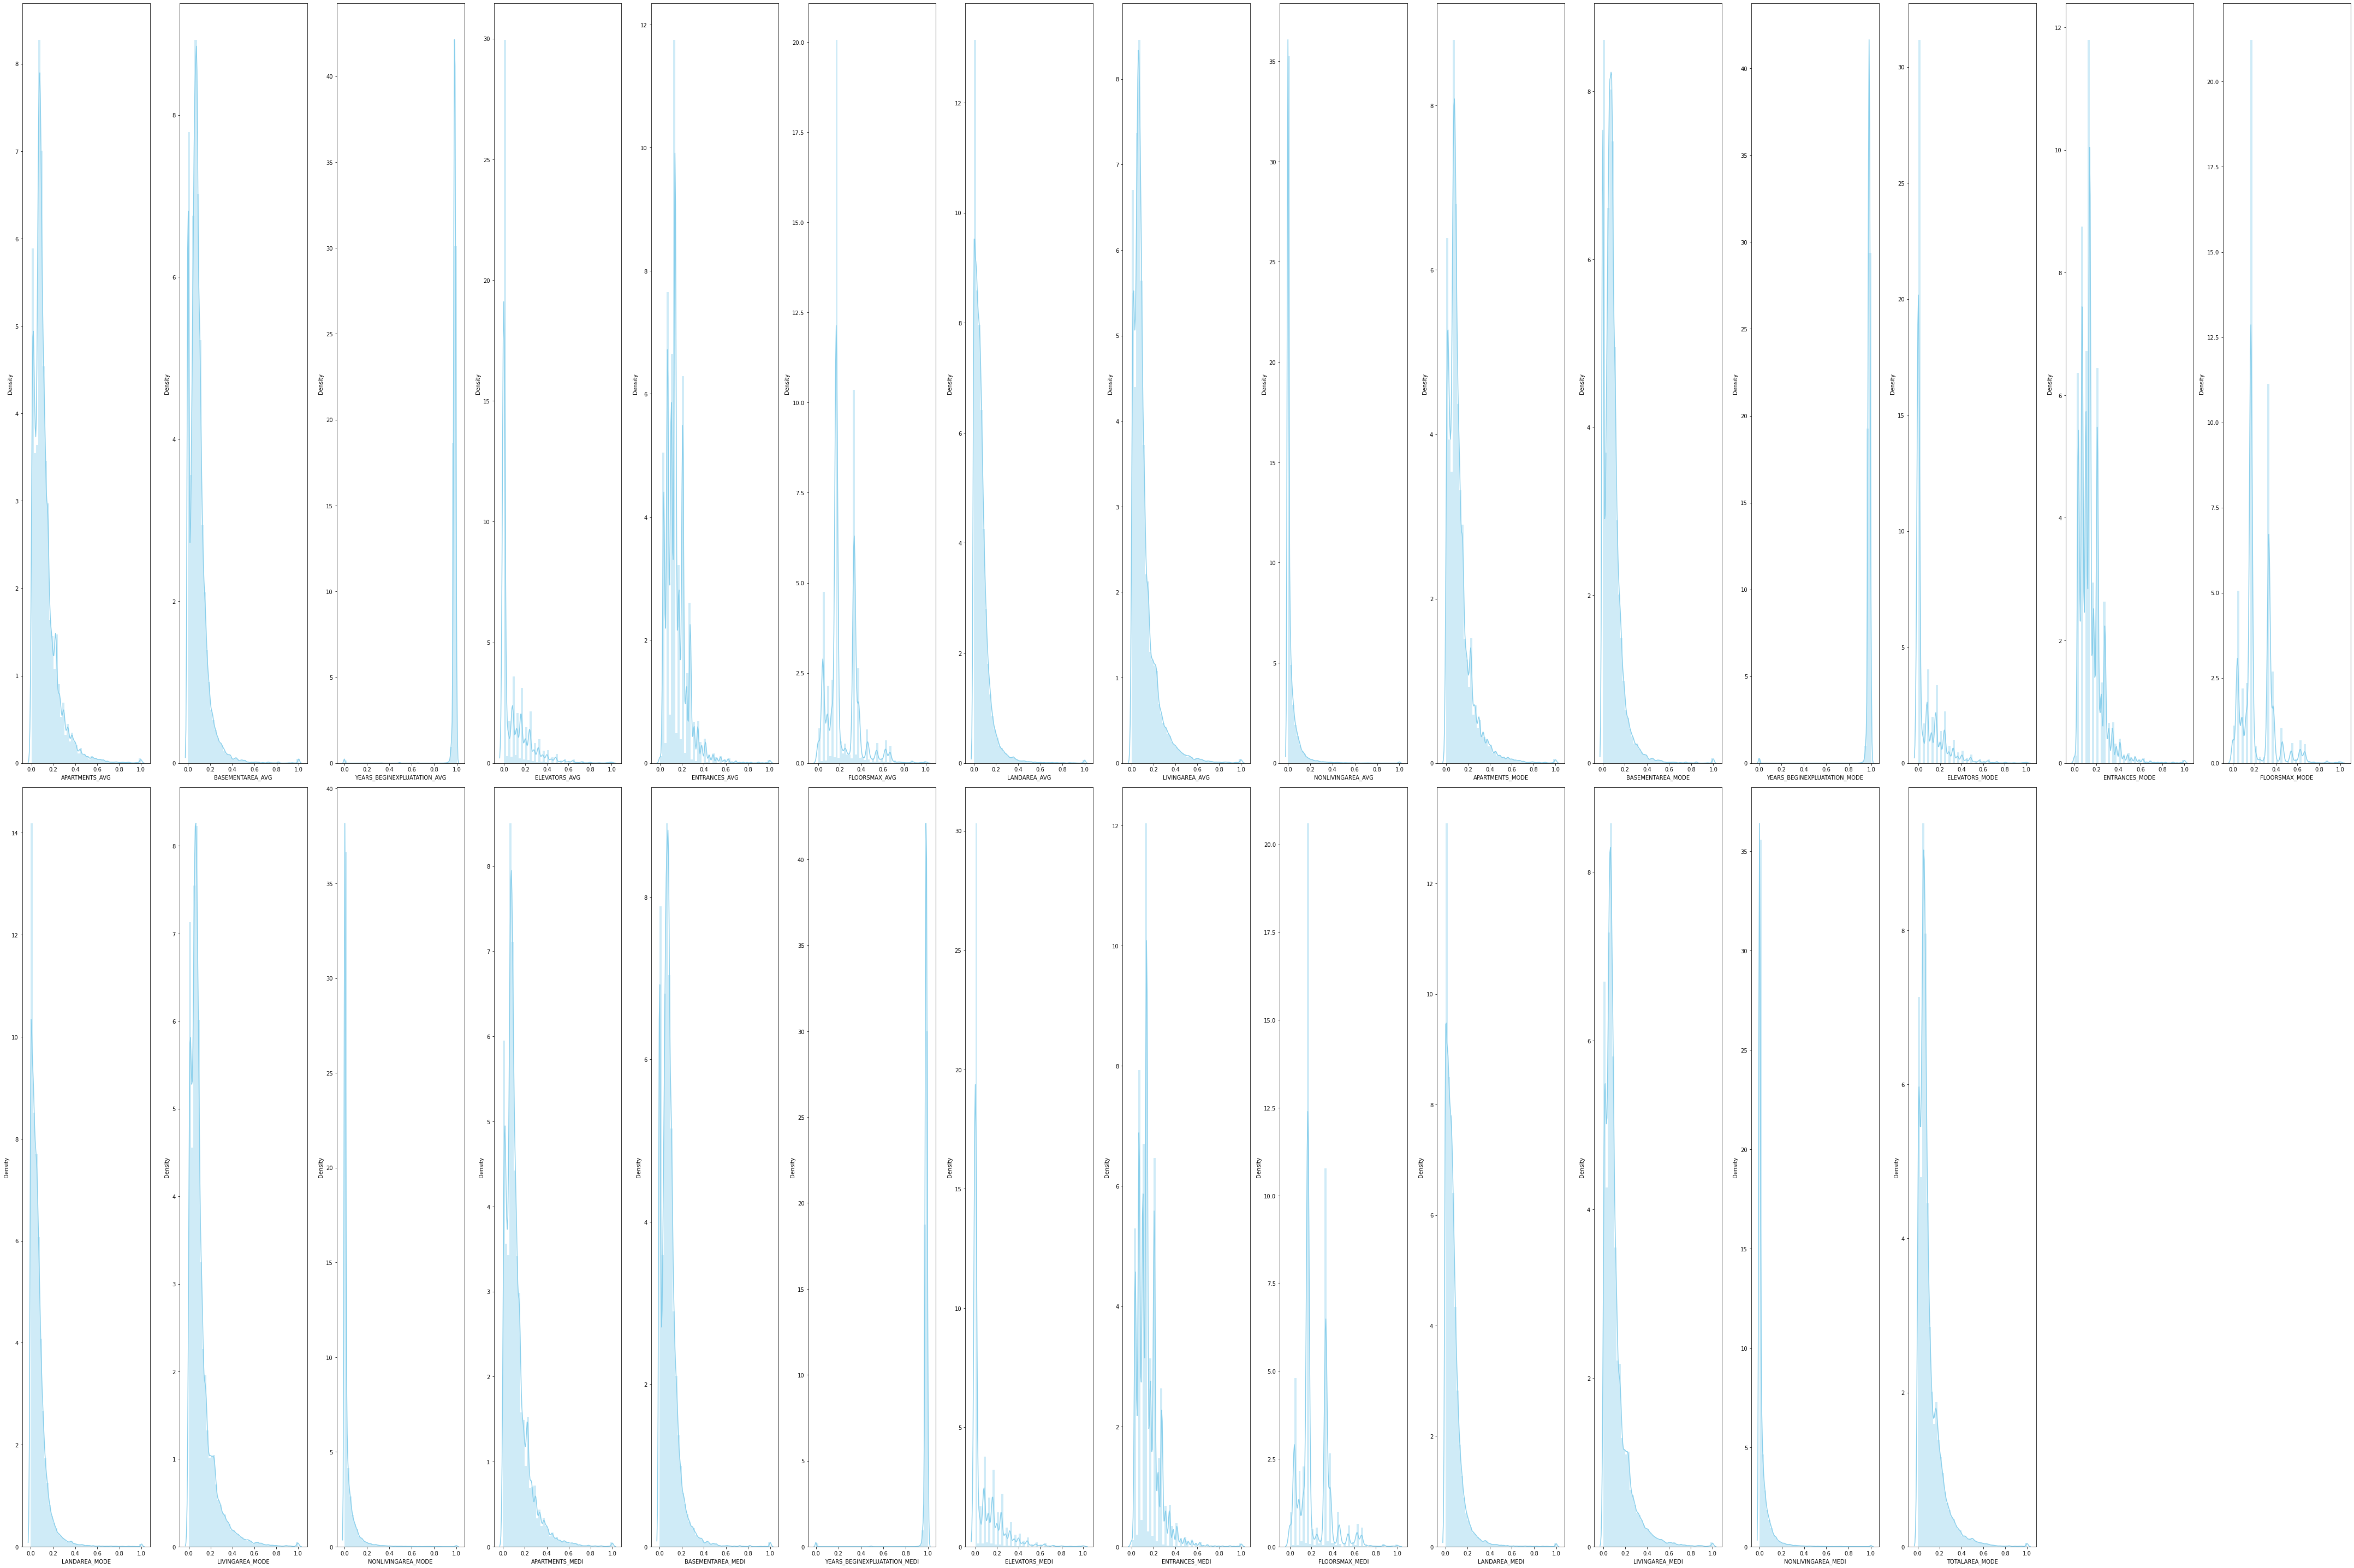

In [ ]:
#Distribution Plot
plt.figure(figsize=(60,40))

features = columns_missing_above_50_num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Conclusion : There is no columns that is evenly distributed. Thus, imputing with median value will be reasoneable.

In [ ]:
for i in columns_missing_above_50_num: 
  df[i].fillna(df[i].median(), inplace=True)

In [ ]:
for i in columns_missing_above_50_cat : 
  print(df[i].value_counts())

block of flats      149455
specific housing      1491
terraced house        1206
Name: HOUSETYPE_MODE, dtype: int64
Panel           65592
Stone, brick    64360
Block            9173
Wooden           5330
Mixed            2283
Monolithic       1760
Others           1610
Name: WALLSMATERIAL_MODE, dtype: int64
No     158332
Yes      2313
Name: EMERGENCYSTATE_MODE, dtype: int64


In [ ]:
df['HOUSETYPE_MODE'].fillna('block of flats', inplace = True)
df['WALLSMATERIAL_MODE'].fillna('Panel', inplace = True)
df['EMERGENCYSTATE_MODE'].fillna('No', inplace = True)

In [ ]:
#Recheck For Missing Value 
((df.isnull().sum()/len(df)*100))

TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OWN_CAR_AGE                     0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT        

##Preprocessing Categorical Feature

In [ ]:
categorical_new = df.select_dtypes('object').columns
categorical_new

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
df[categorical_new].head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0  House / apartment                  WEDNESDAY  Business Entity Type 3   
1  House / apartment                     MONDAY                  School   
2  House / apartment                     MONDAY              Government   
3  House / apartment                  WEDNESDAY  Business Entity Type 3   
4  House / apartment                   THURSDAY                Religion   

   HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0  block of flats       Stone, brick                  No  
1  block of flats              Block                  No  
2  block of flats              Panel                  No  
3  block of flats              Panel                  No  
4  block of flats              Panel                  No

In [ ]:
df[categorical_new].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              305545      305545       305545          305545   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               277620      201098       201510          211884   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           305545           305545                         305545   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248126           157798                         217187   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
count              305545             305545                     305545   
unique                  5                  6                          7   
top               Married  House / apartment                    TUESDAY   
freq               195277             271158                      53588   

             ORGANIZATION_TYPE  HOUSETYPE_MODE WALLSMATERIAL_MODE  \
count                   305545          305545             305545   
unique                      58               3                  7   
top     Business Entity Type 3  block of flats              Panel   
freq                     67517          302848             221029   

       EMERGENCYSTATE_MODE  
count               305545  
unique                   2  
top                     No  
freq                303232

In [ ]:
numerical_new = df.select_dtypes([np.number]).columns.tolist()
numerical_new

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 '

See the percentage of each categorical values

In [ ]:
for col in categorical_new :
  print(df[col].value_counts(normalize=True)*100)
  print('\n')

Cash loans         90.860593
Revolving loans     9.139407
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.816165
M      34.182526
XNA     0.001309
Name: CODE_GENDER, dtype: float64


N    65.951006
Y    34.048994
Name: FLAG_OWN_CAR, dtype: float64


Y    69.34625
N    30.65375
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.207678
Family             13.081216
Spouse, partner     3.702564
Children            1.063346
Other_B             0.575038
Other_A             0.282773
Group of people     0.087385
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.644766
Commercial associate    23.272186
Pensioner               18.005858
State servant            7.060171
Unemployed               0.006218
Student                  0.005891
Businessman              0.003273
Maternity leave          0.001636
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.081837
Higher education                 24.284803
Incomplete higher                 3

We need to drop `HOUSETYPE_MODE` and `EMERGENCYSTATE_MODE` since it is dominated by a single categorical value

In [ ]:
df = df.drop(['HOUSETYPE_MODE','EMERGENCYSTATE_MODE'], axis = 1)

###Preprocessing 2 unique value categorical feature

#### `NAME_CONTRACT_TYPE`

In [ ]:
df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
#1 for cash loans and 0 for revolving loans 
name_cntr_enc = {"Cash loans" : 1,
                 "Revolving loans":0 
                 }
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map(name_cntr_enc)
df['NAME_CONTRACT_TYPE'].value_counts()

1    277620
0     27925
Name: NAME_CONTRACT_TYPE, dtype: int64

####`FLAG_OWN_CAR` and `FLAG_OWN_REALTY`	

In [ ]:
Y_N_Column = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for item in Y_N_Column: 
  df[item] = [1 if each=='Y' else 0 for each in df[item]]

In [ ]:
df[Y_N_Column].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

##Preprocessing `NAME_EDUCATION_TYPE`

In [ ]:
#Unique Value of Education Type 
df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
#Encoding by using ordinal encoding
ed_enc = {"Lower secondary" : 0,
          "Secondary / secondary special" : 1,
          "Academic degree" : 2,
          "Incomplete higher" : 3, 
          "Higher education":4}
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(ed_enc)
df['NAME_EDUCATION_TYPE'].head()

0    1
1    4
2    1
3    1
4    1
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
df['NAME_EDUCATION_TYPE'].value_counts(ascending=True)

2       164
0      3793
3     10200
4     74201
1    217187
Name: NAME_EDUCATION_TYPE, dtype: int64

##Preprocessing other categorical feature

In [ ]:
remaining_categorical = df.select_dtypes('object').columns.tolist()
print(remaining_categorical)

['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE']


XNA gender is only 0,000% of the whole gender. Thus, XNA gender doesnt have any meaning for the modelling. 

In [ ]:
#Drop XNA Value for gender column 
df = df[df.CODE_GENDER != 'XNA']

In [ ]:
df.shape

(305541, 101)

Preprocessing CODE_GENDER with 1 and 0. 

In [ ]:
df['CODE_GENDER'].value_counts()

F    201098
M    104443
Name: CODE_GENDER, dtype: int64

In [ ]:
df['CODE_GENDER'] = [1 if each=='F' else 0 for each in df['CODE_GENDER']]

In [ ]:
#Preprocessing Other Categorical Value with One Hot Encoding
onehot_categorical = pd.get_dummies(df[df.select_dtypes('object').columns.tolist()], drop_first=True)

In [ ]:
onehot_categorical.head()

NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Group of people  \
0                       0                                0   
1                       1                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Unaccompanied  \
0                                0                              1   
1                                0                              0   
2                                0                              1   
3                                0                              1   
4                                0                              1   

   NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Maternity leave  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
0                           0                               0   
1                           0                               1   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Unemployed  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   NAME_INCOME_TYPE_Working  NAME_FAMILY_STATUS_Married  \
0                         1                           0   
1                         0                           1   
2                         1                           0   
3                         1                           0   
4                         1                           0   

   NAME_FAMILY_STATUS_Separated  NAME_FAMILY_STATUS_Single / not married  \
0                             0                                        1   
1                             0                                        0   
2                             0                                        1   
3                             0                                        0   
4                             0                                        1   

   NAME_FAMILY_STATUS_Widow  NAME_HOUSING_TYPE_House / apartment  \
0                         0                                    1   
1                         0                                    1   
2                         0                                    1   
3                         0                                    1   
4                         0                                    1   

   NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_Office apartment  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0  

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305541 entries, 0 to 307510
Data columns (total 101 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    TARGET                        305541 non-null  int64  
 1    NAME_CONTRACT_TYPE            305541 non-null  int64  
 2    CODE_GENDER                   305541 non-null  int64  
 3    FLAG_OWN_CAR                  305541 non-null  int64  
 4    FLAG_OWN_REALTY               305541 non-null  int64  
 5    CNT_CHILDREN                  305541 non-null  int64  
 6    AMT_INCOME_TOTAL              305541 non-null  float64
 7    AMT_CREDIT                    305541 non-null  float64
 8    AMT_ANNUITY                   305541 non-null  float64
 9    AMT_GOODS_PRICE               305541 non-null  float64
 10   NAME_TYPE_SUITE               305541 non-null  object 
 11   NAME_INCOME_TYPE              305541 non-null  object 
 12   NAME_EDUCATION_TYPE         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


#Exploratory Data Analysis

##Check For Outlier (Box Plot)

In [ ]:
#Check for numerical column length 
print(len(numerical_new))

89


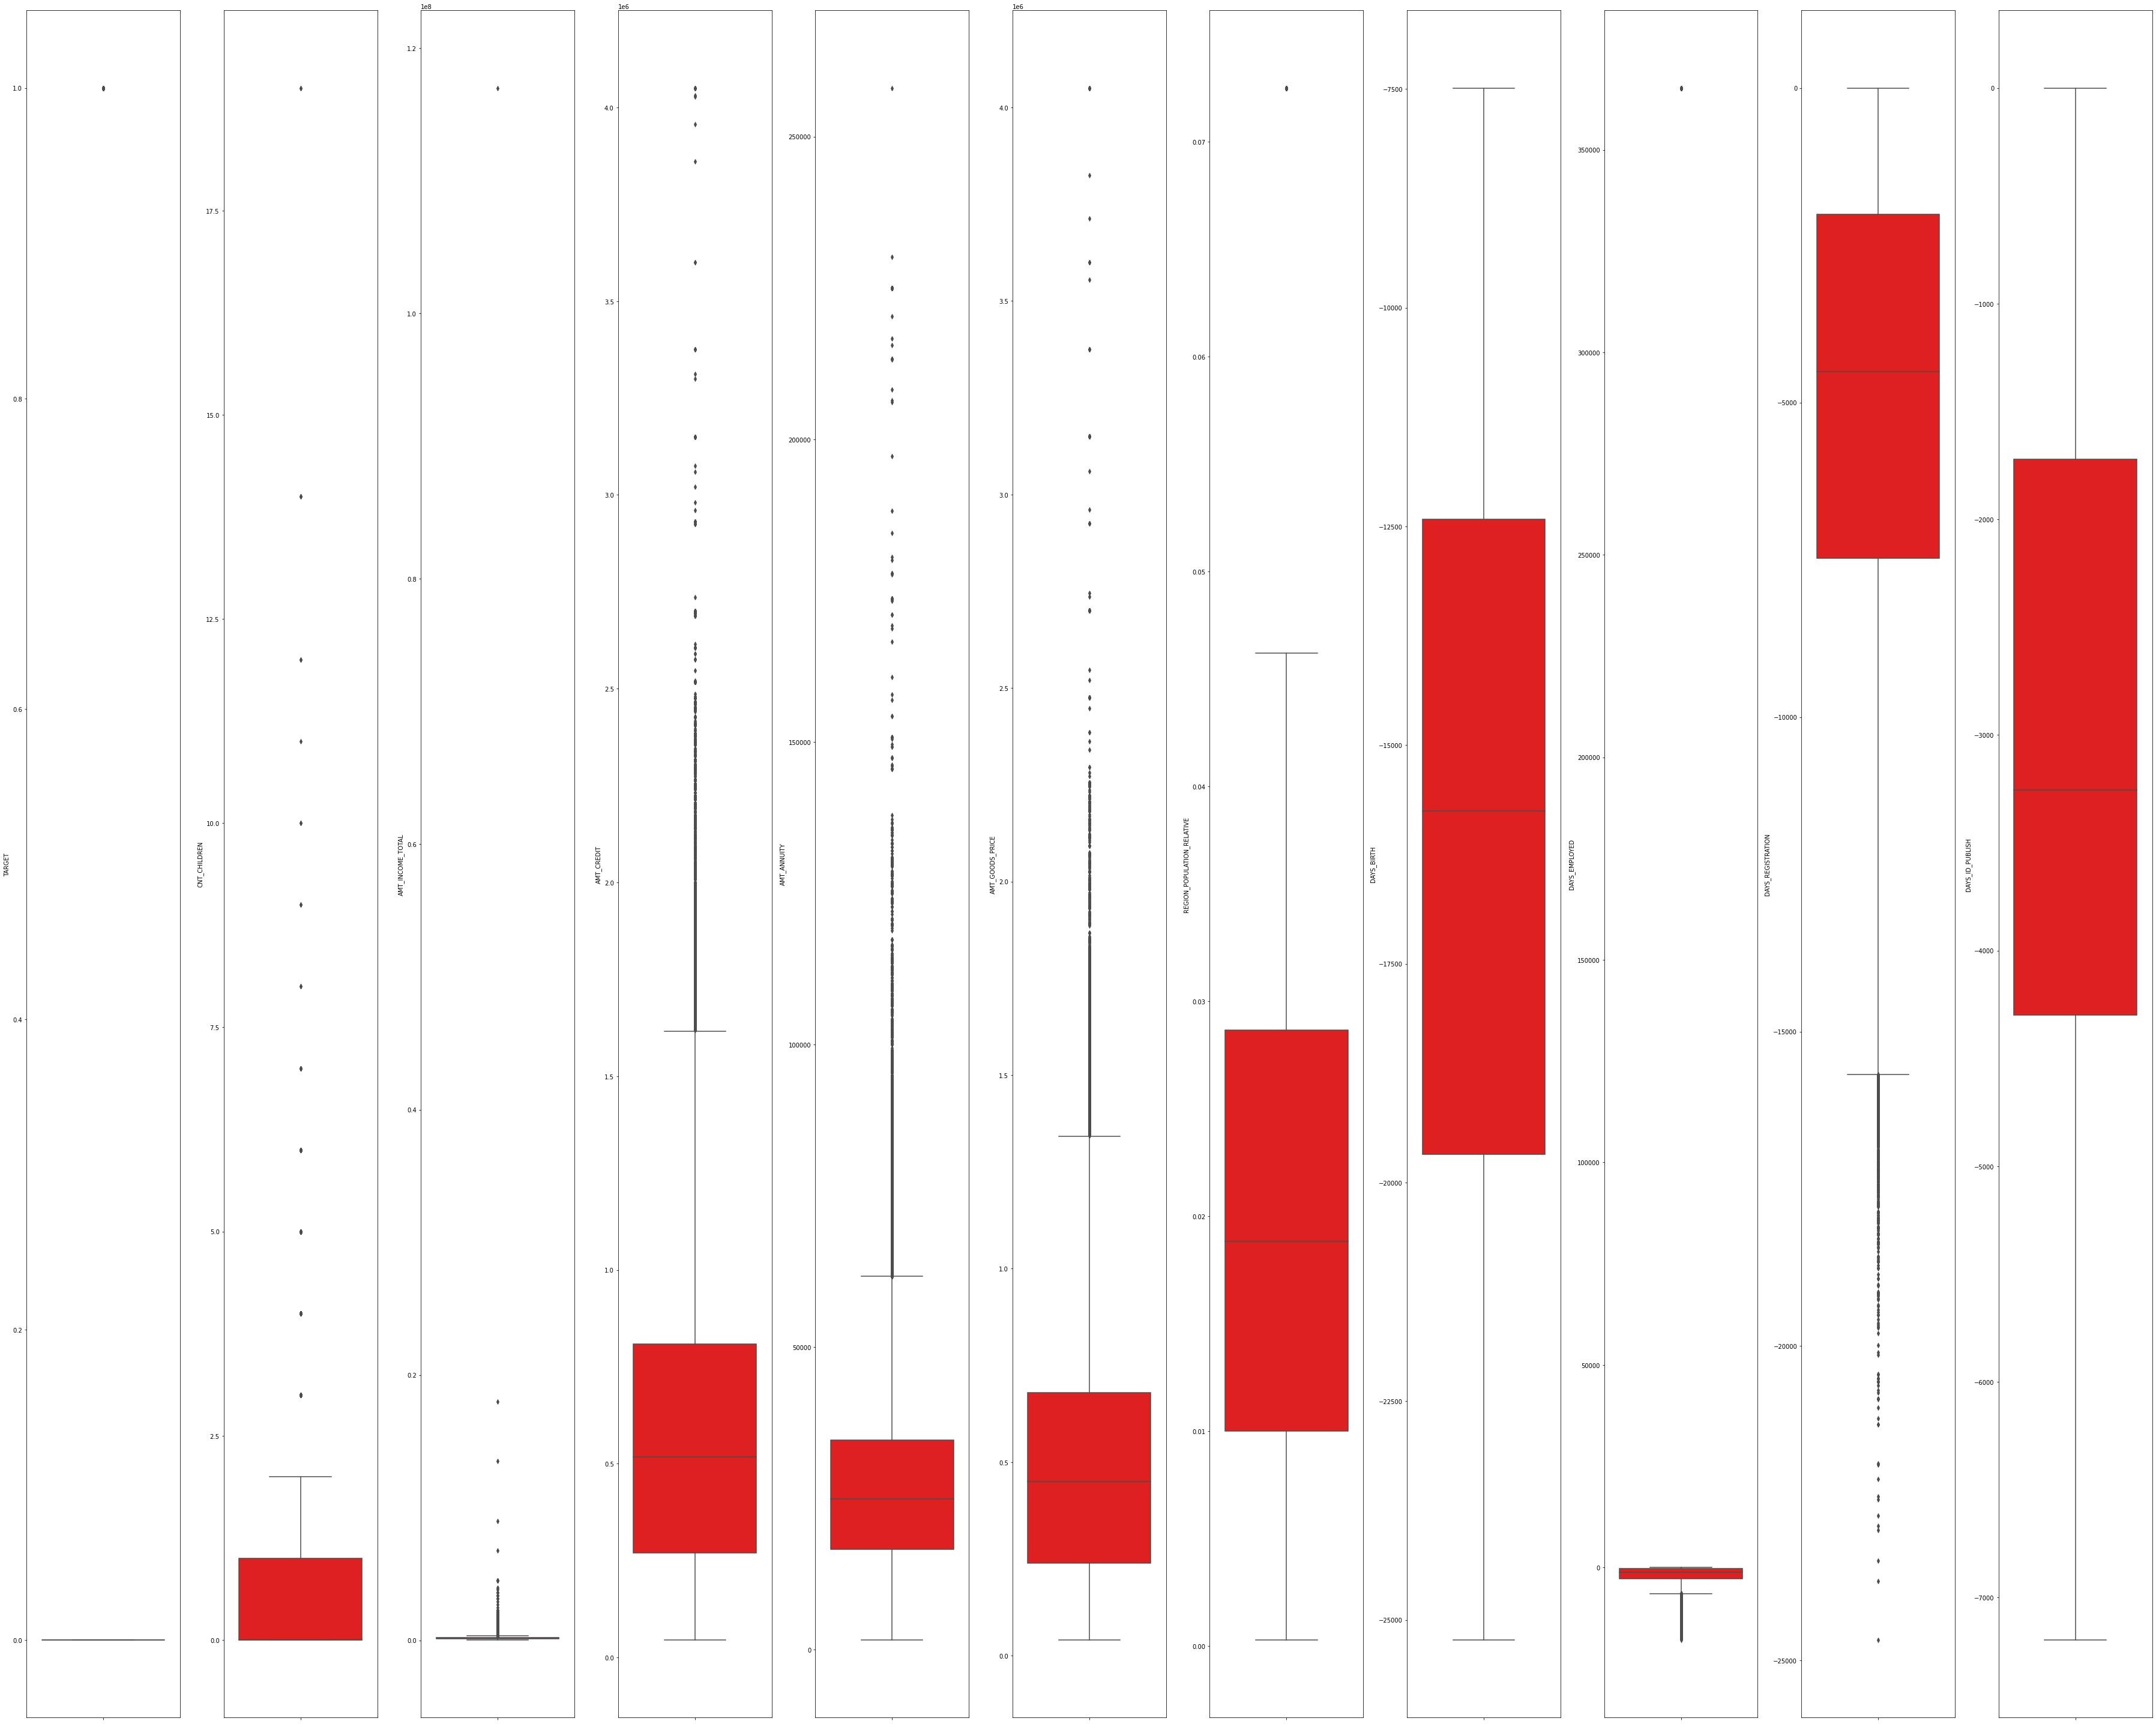

In [ ]:
#For Pure Numerical Values 

plt.figure(figsize=(50,40))

# plotting
features = numerical_new[0:11]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

From the above descriptive statistics, it can  be seen that days_employed max value is positive. This makes no senses since the value should be negative. Thus, we need to manipulate the data.

In [ ]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED'] > 0, df['DAYS_EMPLOYED'].min(), df['DAYS_EMPLOYED'])

In [ ]:
numerical_new_aft = df.select_dtypes([np.number]).columns.tolist()
c = df[numerical_new_aft].columns[(df[numerical_new_aft].nunique() > 4)]
print(len(c))

56


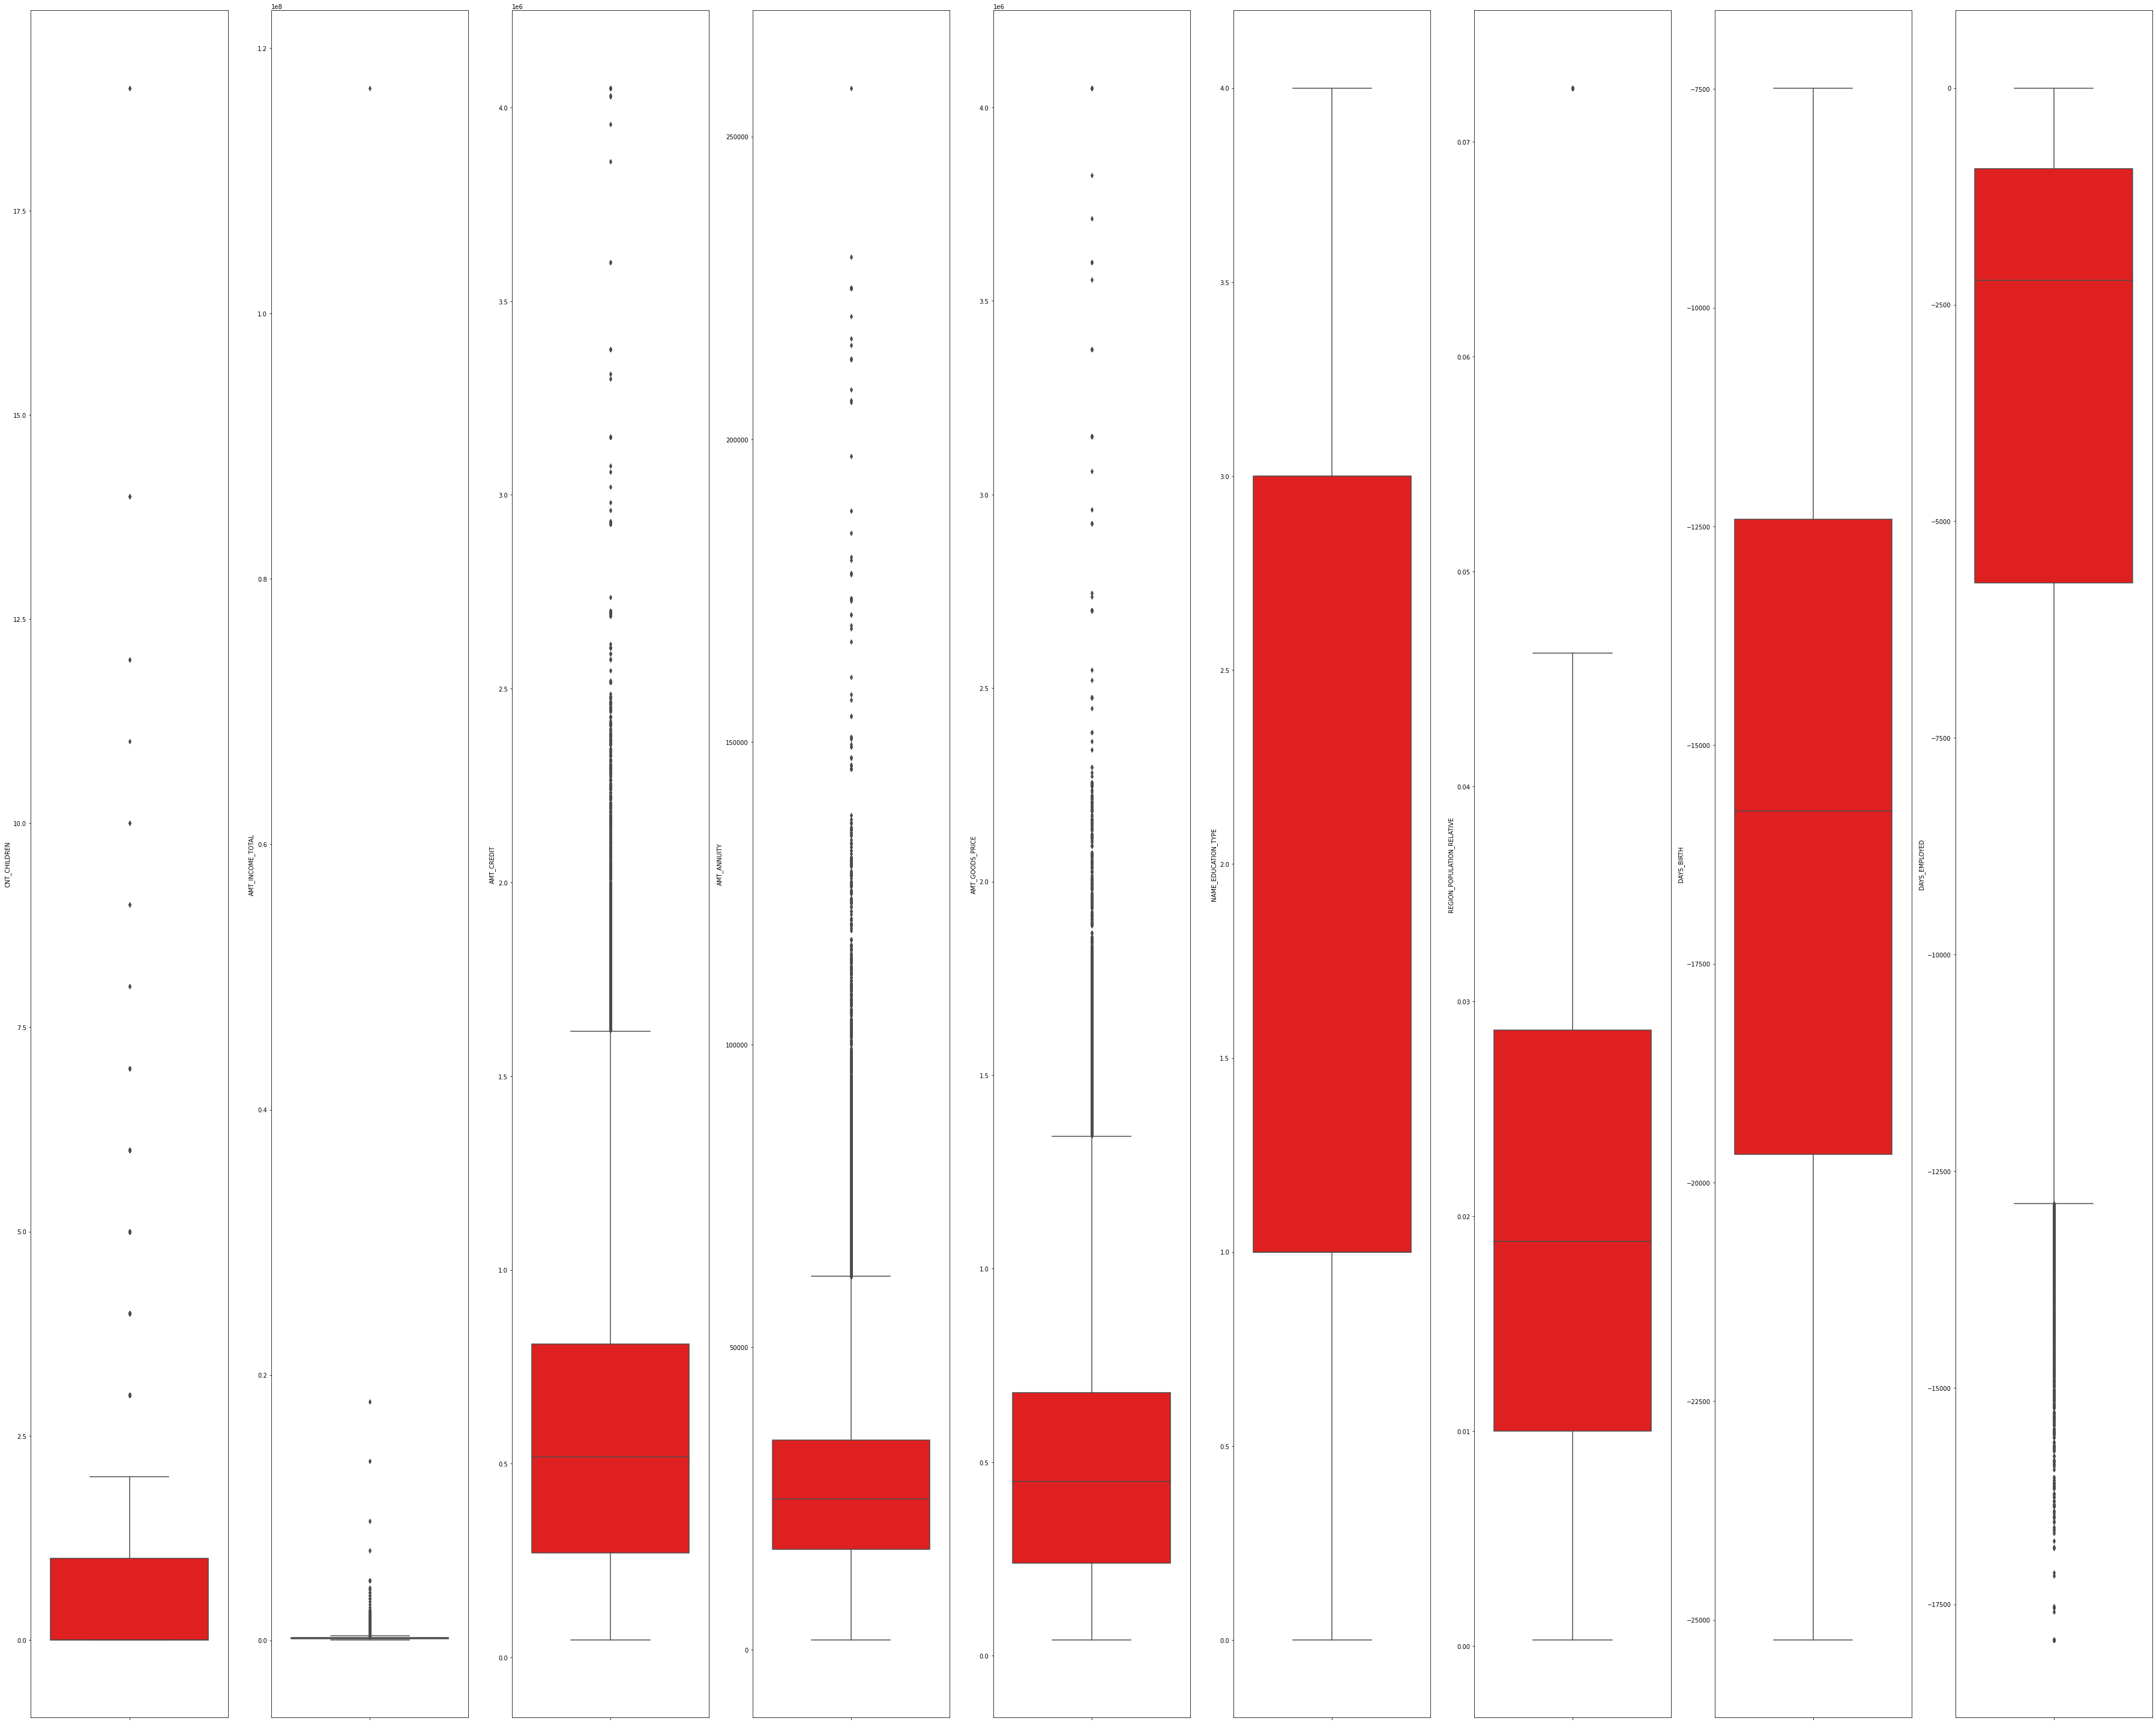

In [ ]:
#Boxplot For Unique Numerical Value Grater than 4 

plt.figure(figsize=(50,40))

# plotting
features = c[0:9]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

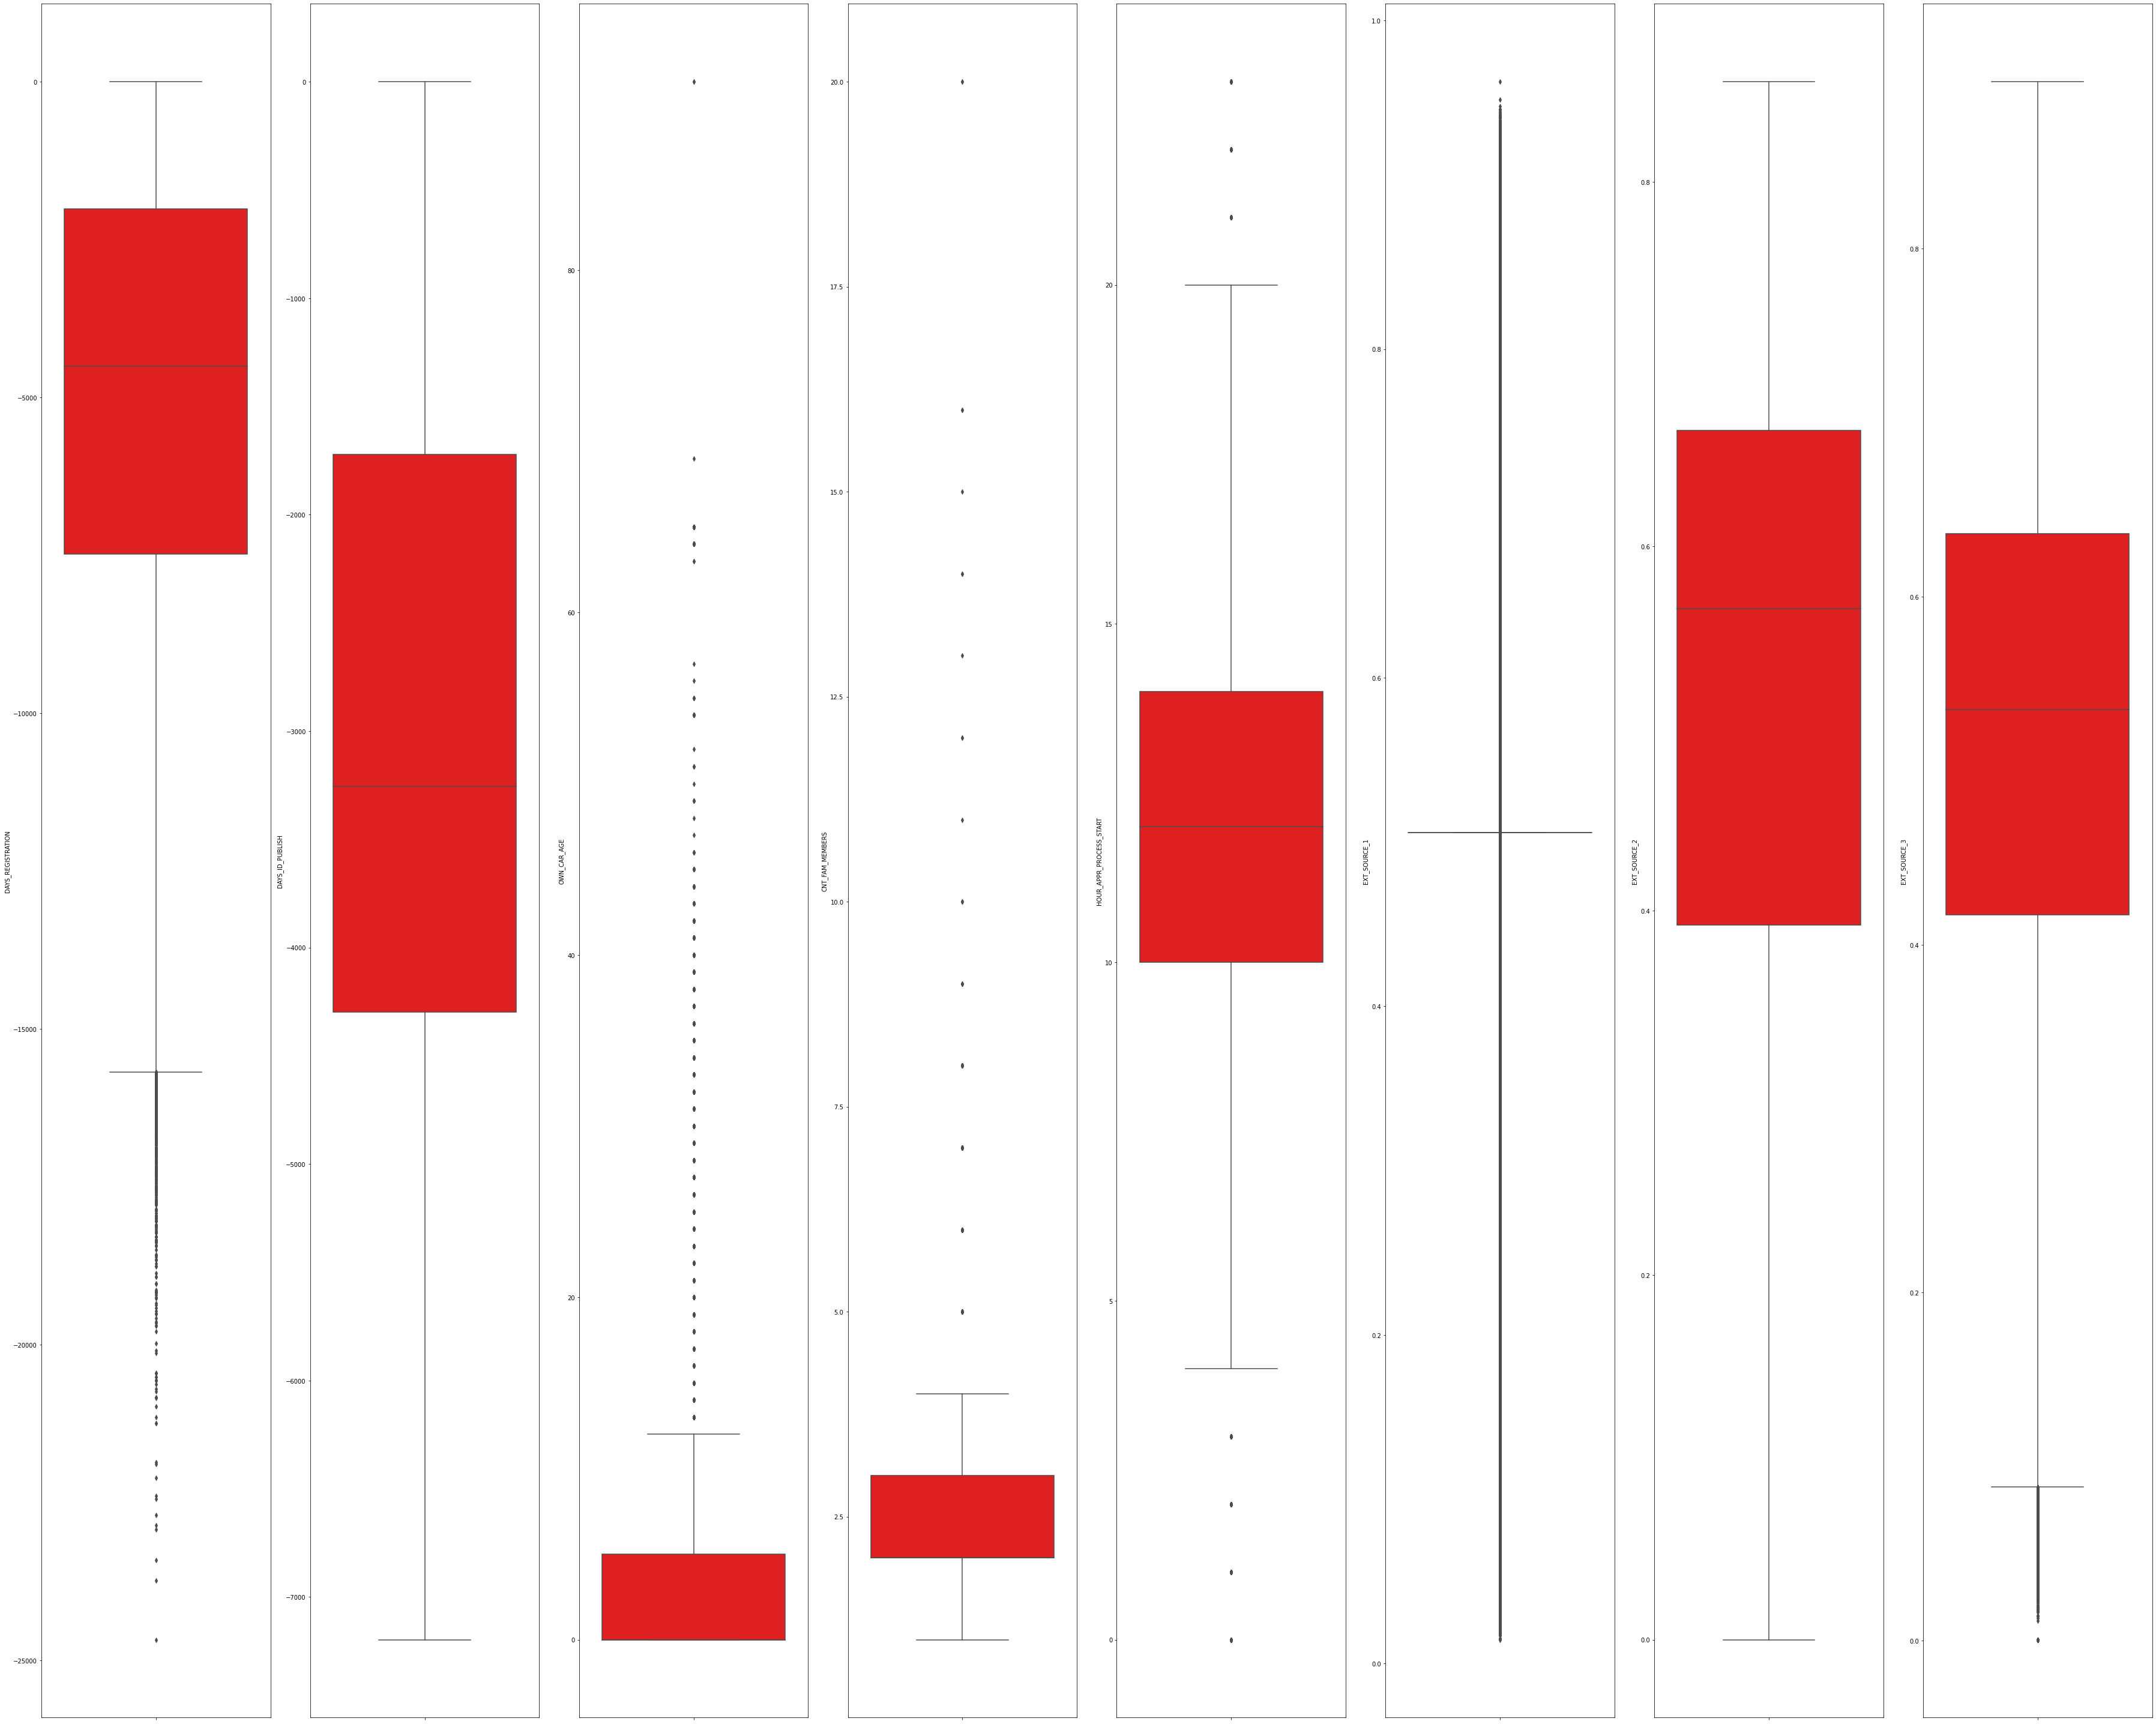

In [ ]:
#Boxplot Continued
plt.figure(figsize=(50,40))

# plotting
features = c[9:17]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

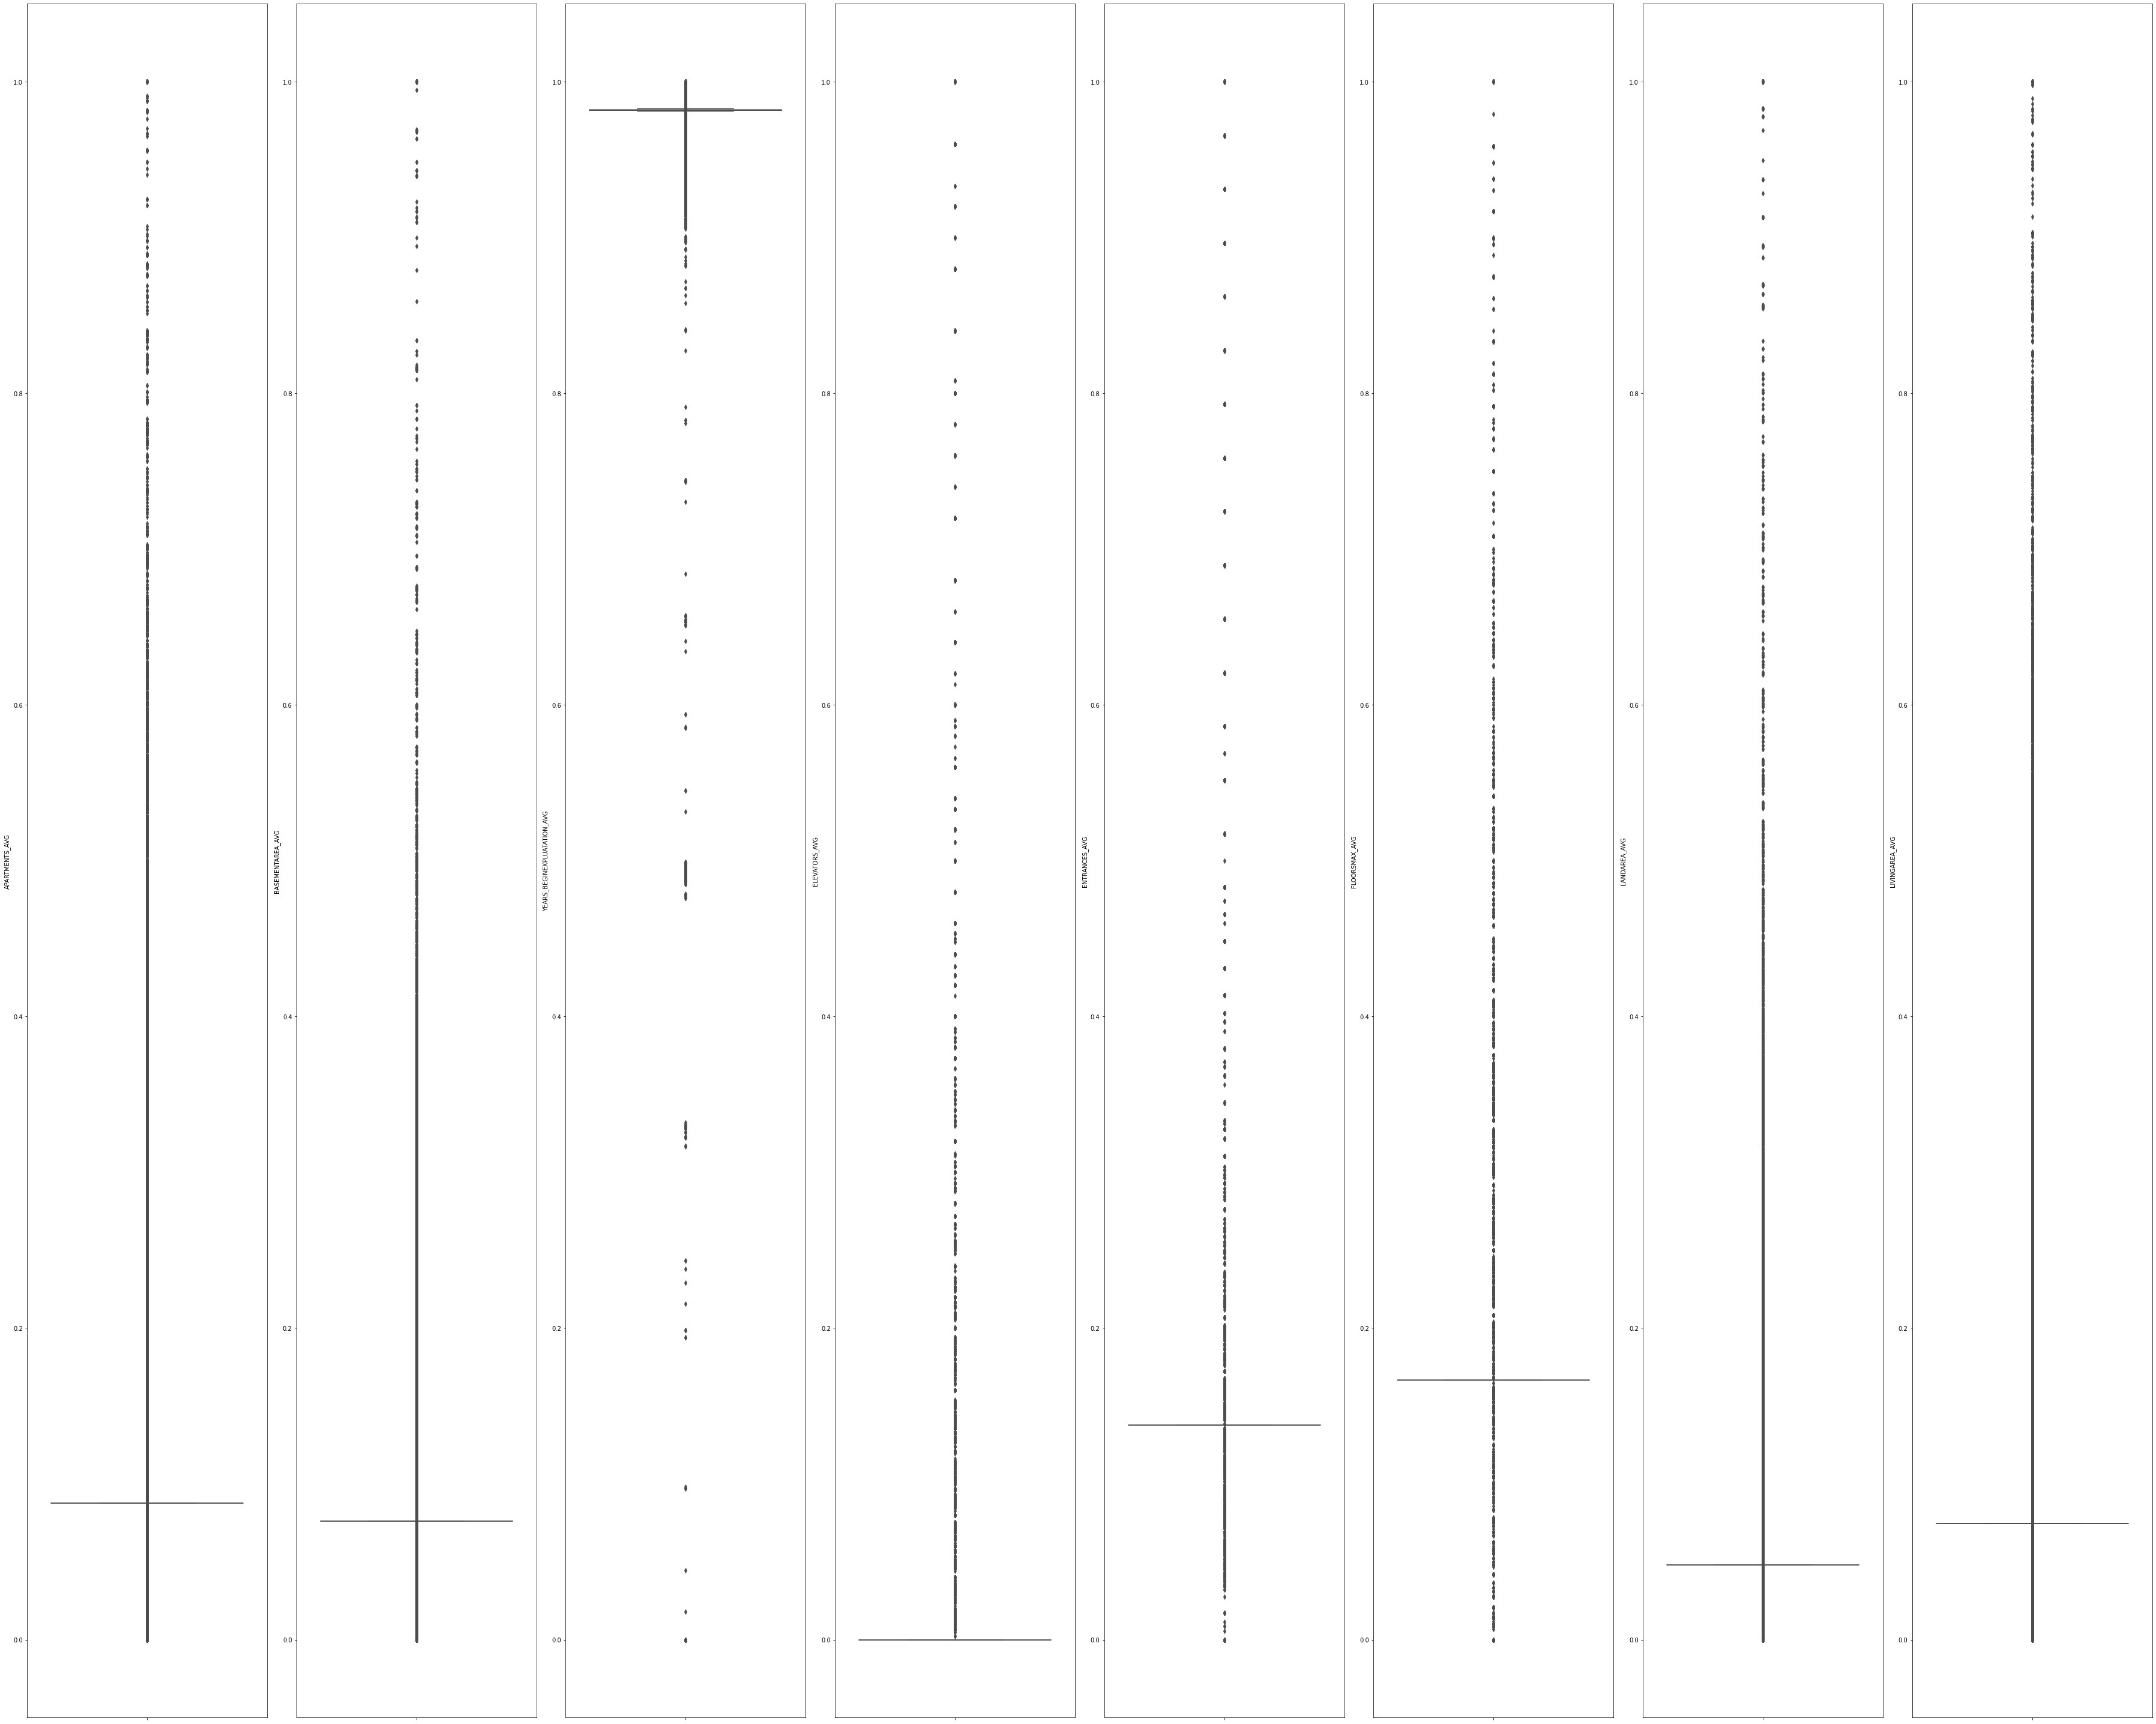

In [ ]:
#Boxplot Continued 
plt.figure(figsize=(50,40))

# plotting
features = c[17:25]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

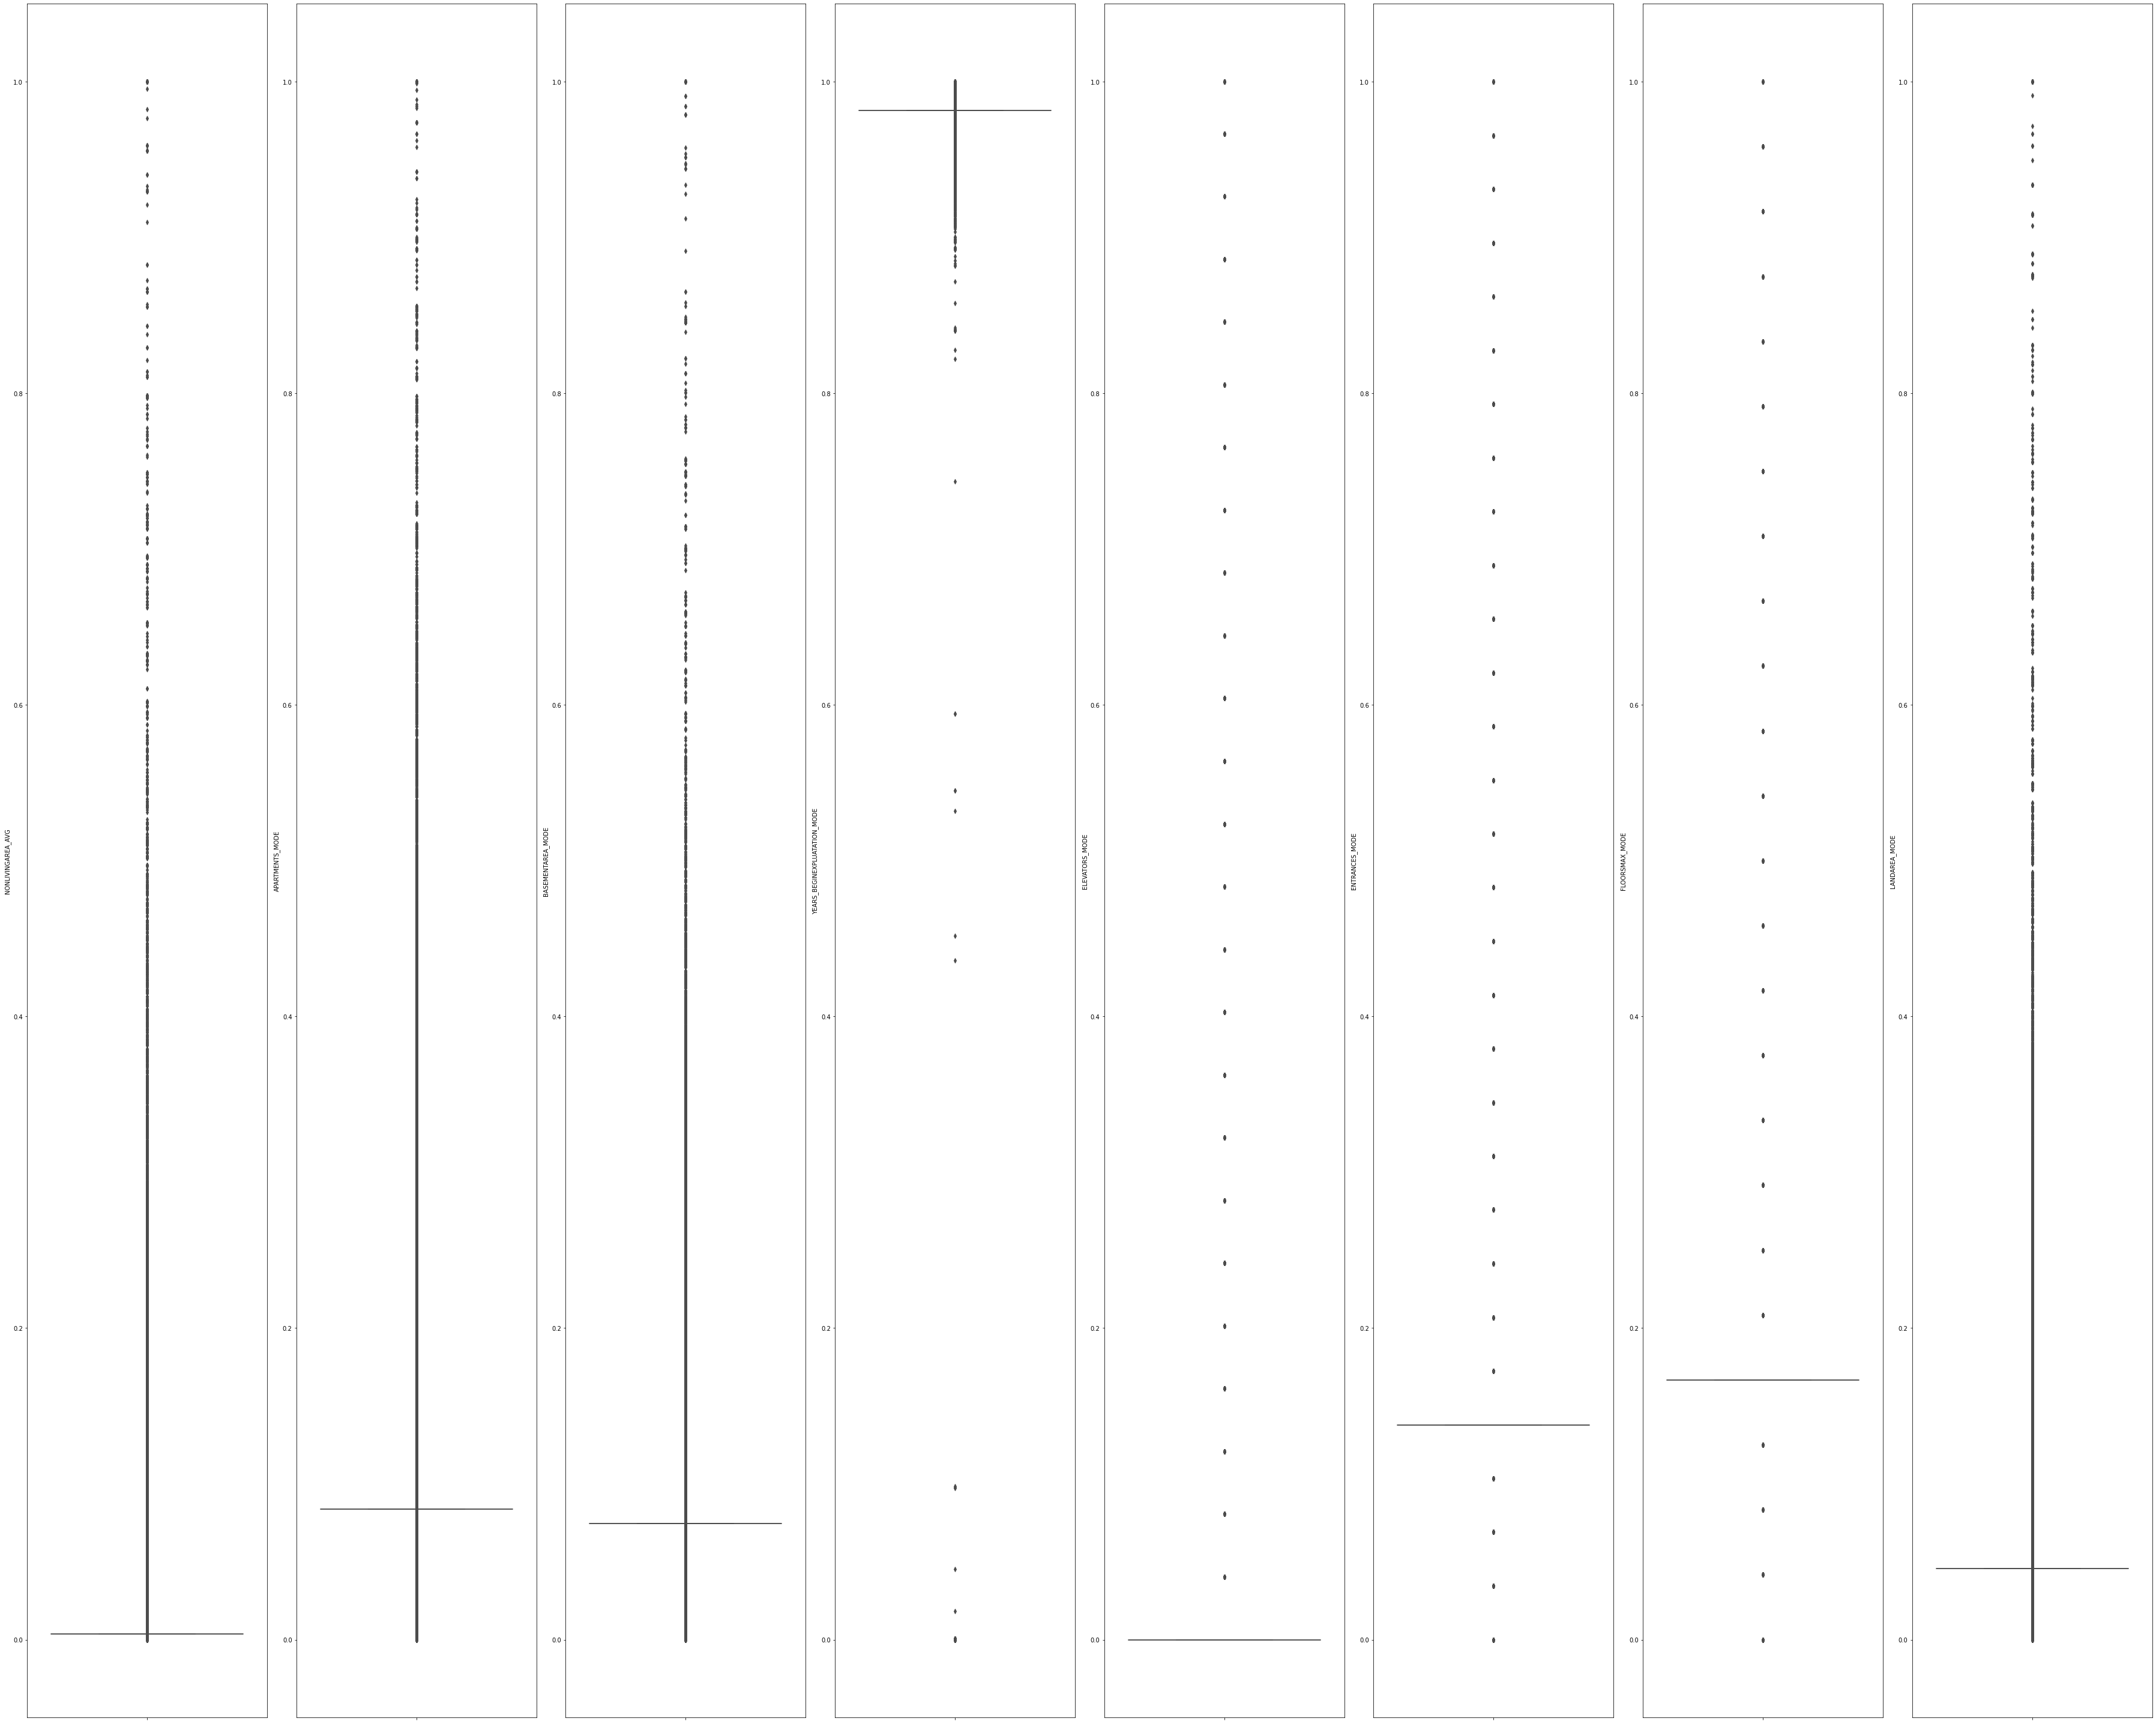

In [ ]:
#Boxplot Continued 
plt.figure(figsize=(50,40))

# plotting
features = c[25:33]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

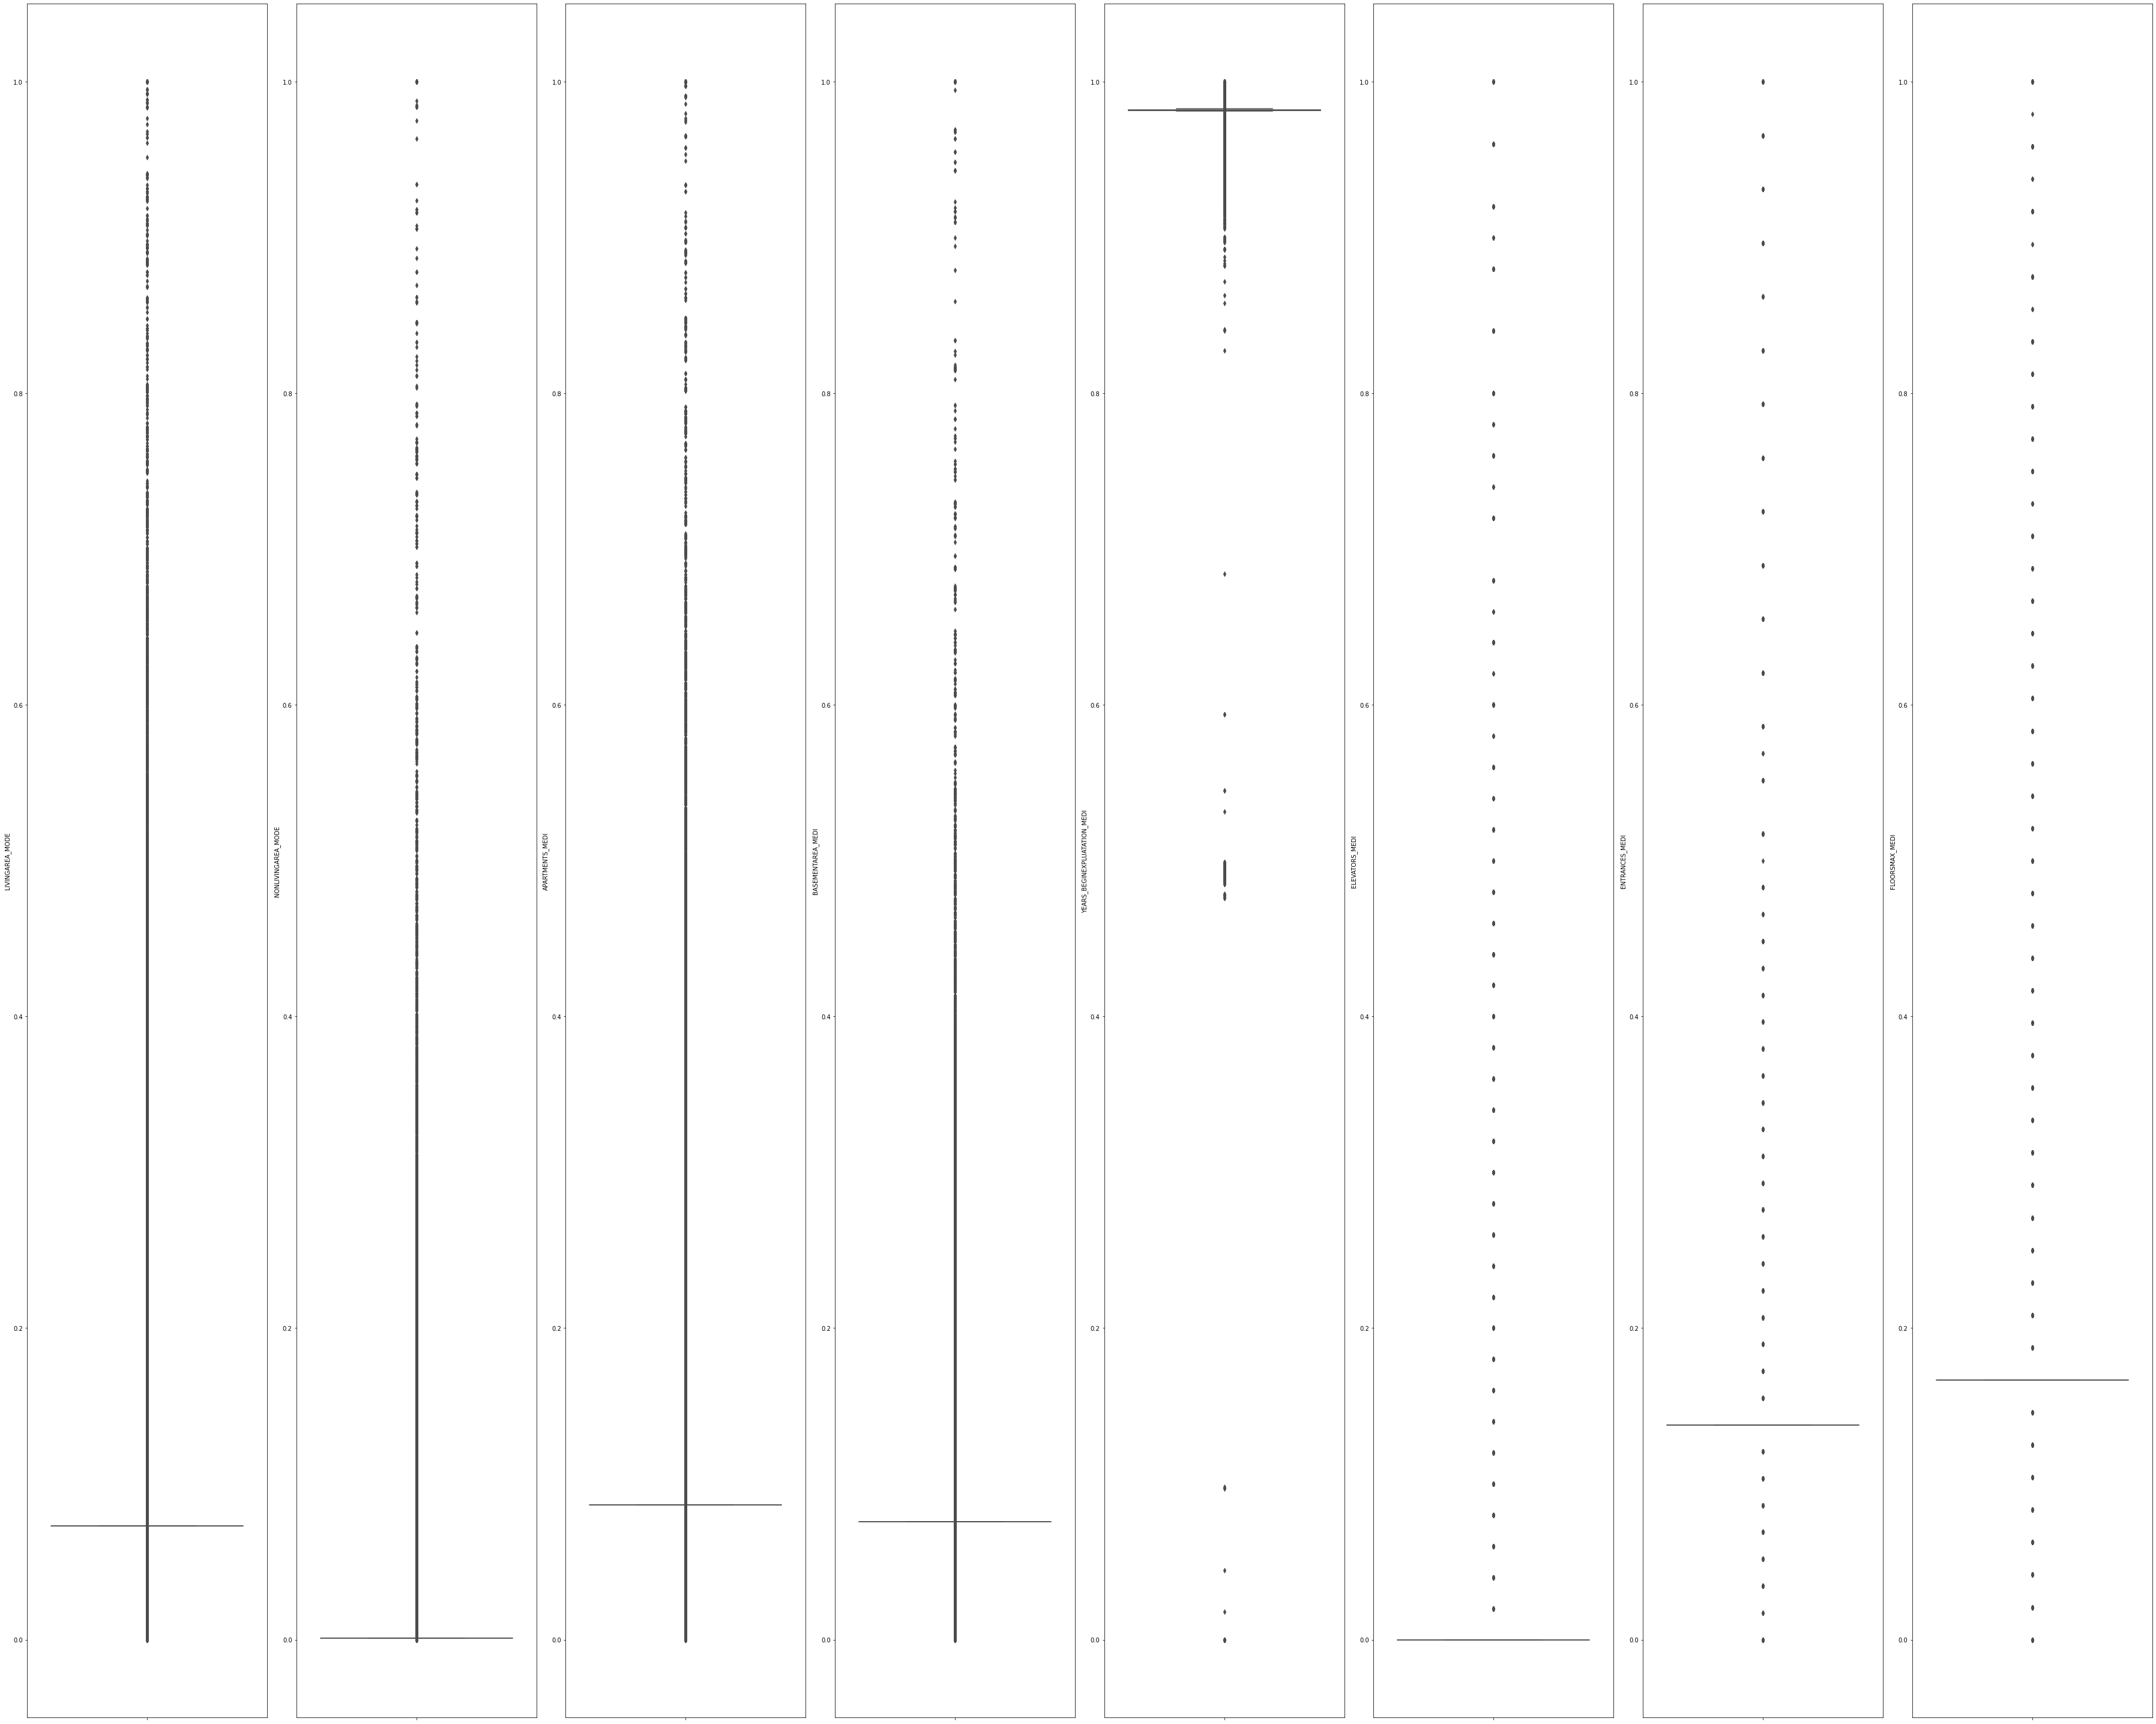

In [ ]:
#Boxplot Continued 
plt.figure(figsize=(50,40))

# plotting
features = c[33:41]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

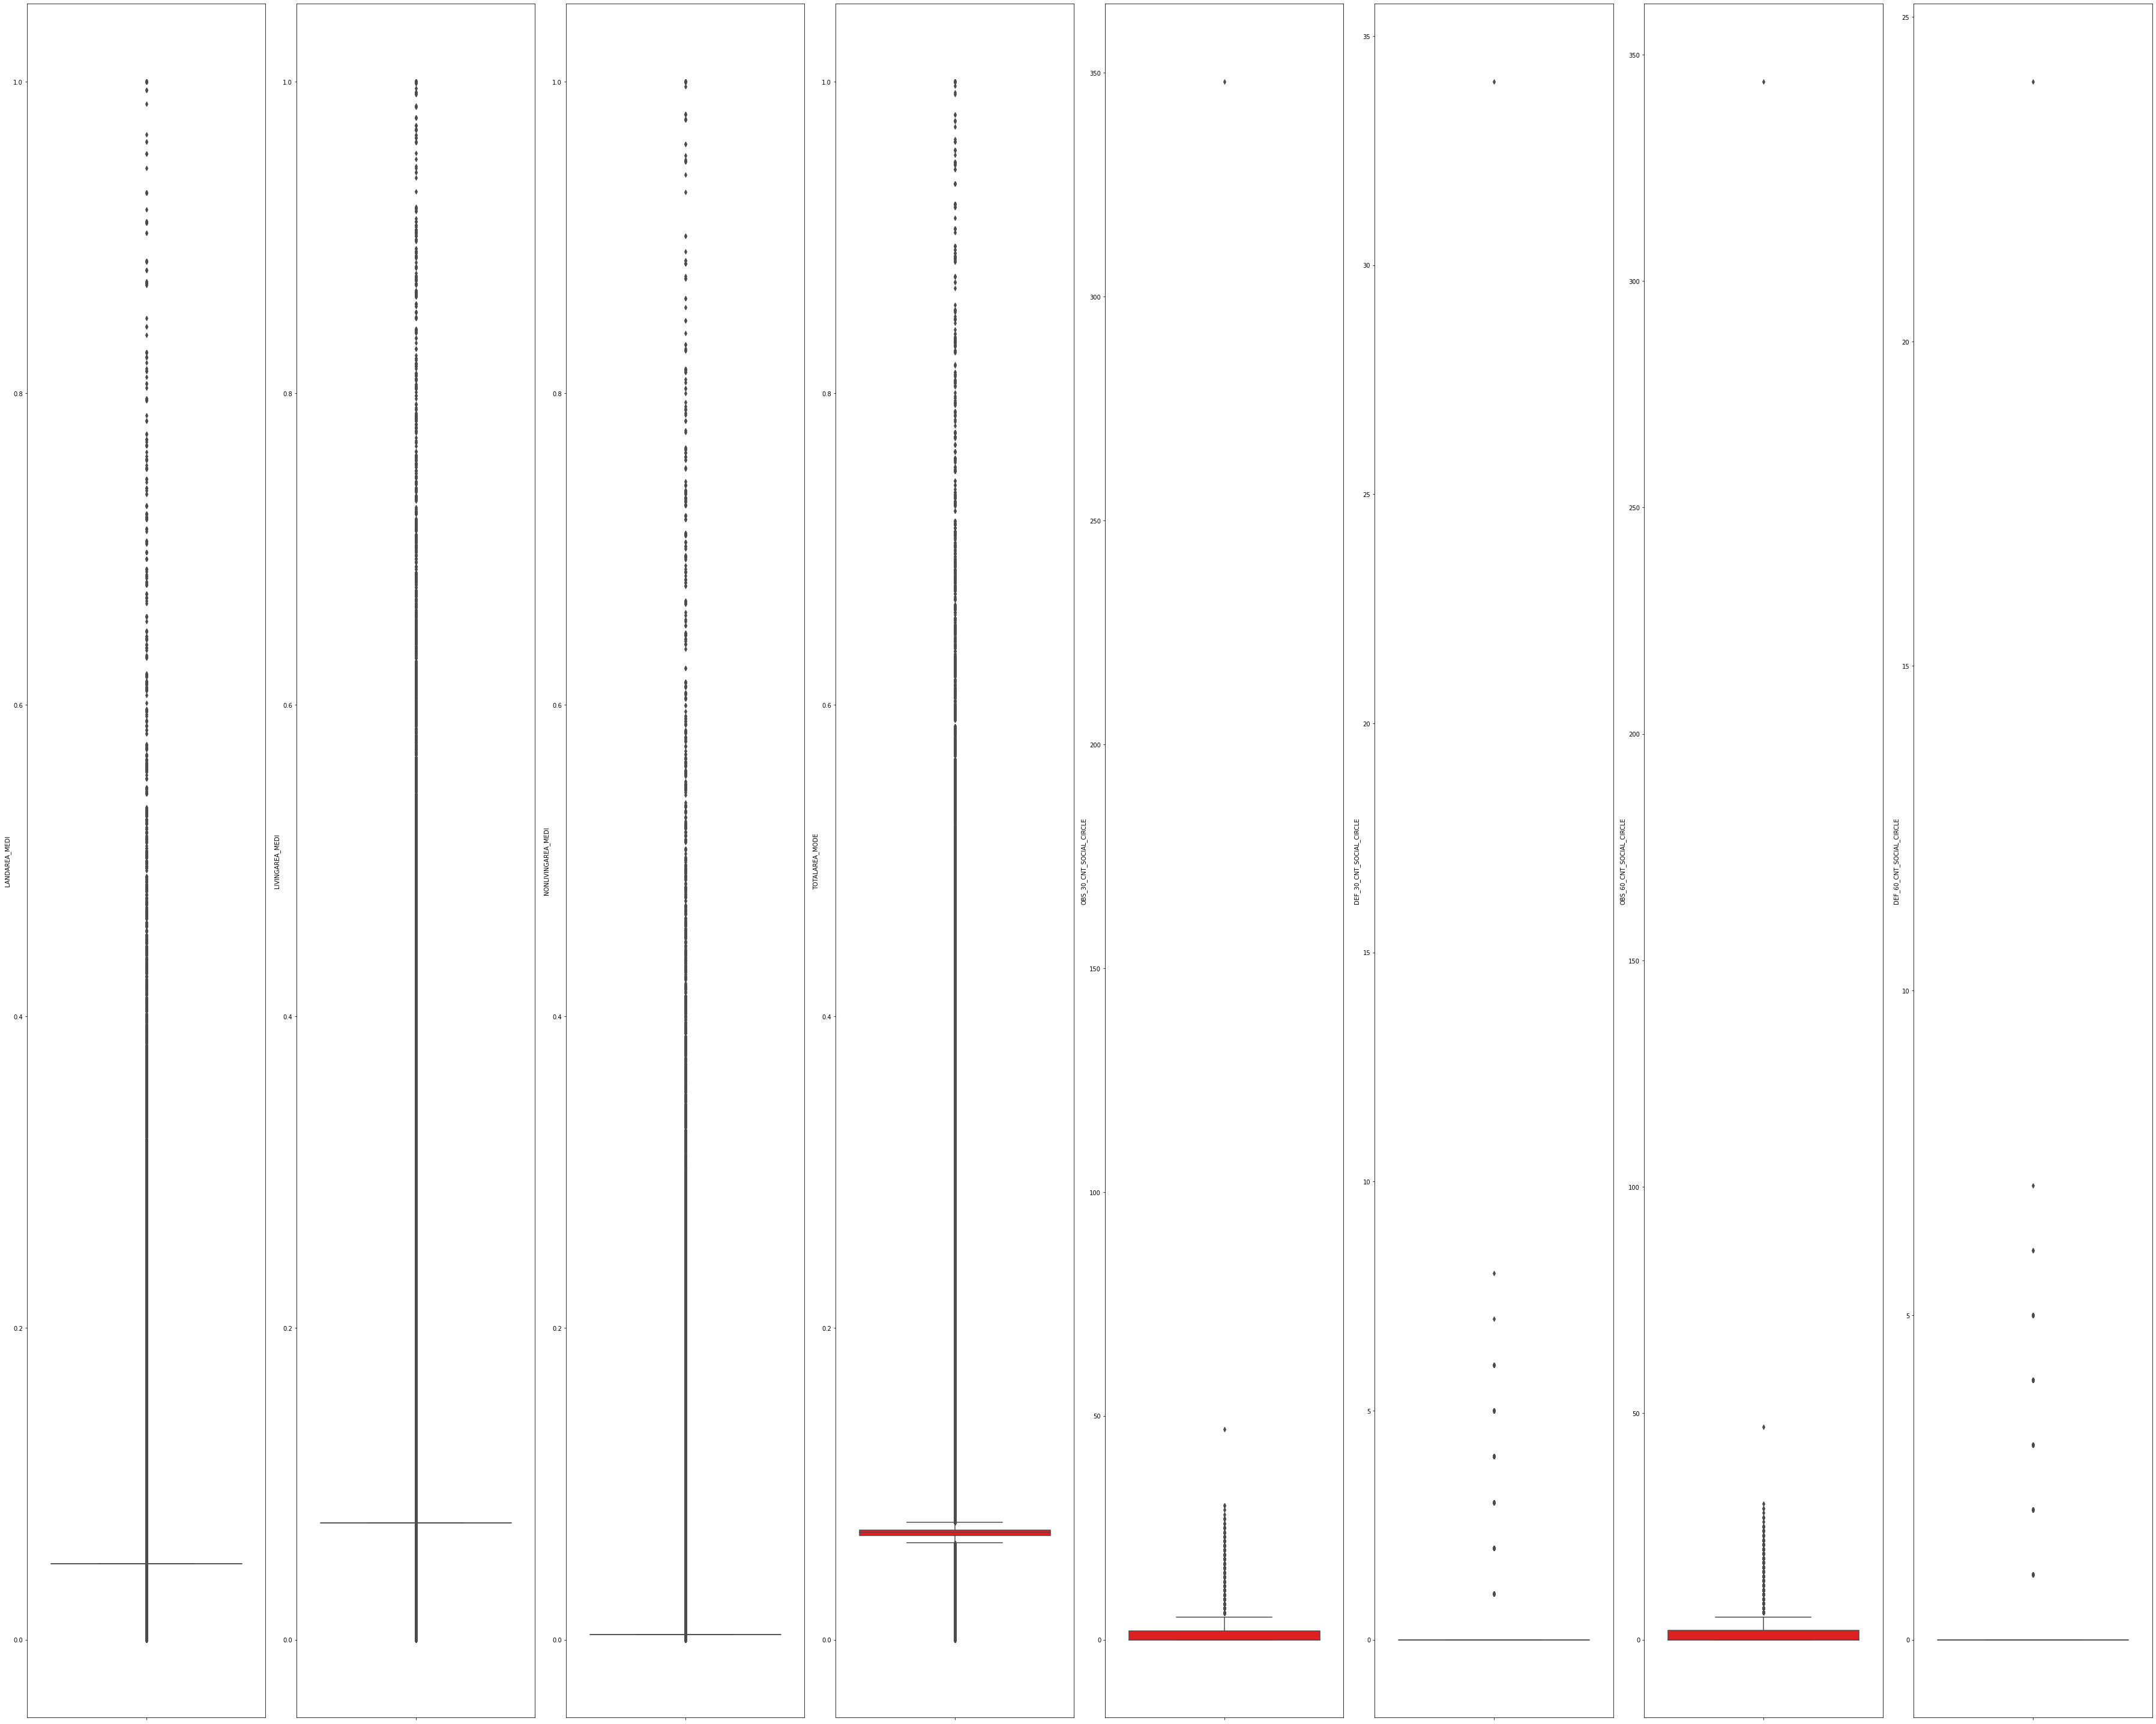

In [ ]:
#Boxplot Continued 
plt.figure(figsize=(50,40))

# plotting
features = c[41:49]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

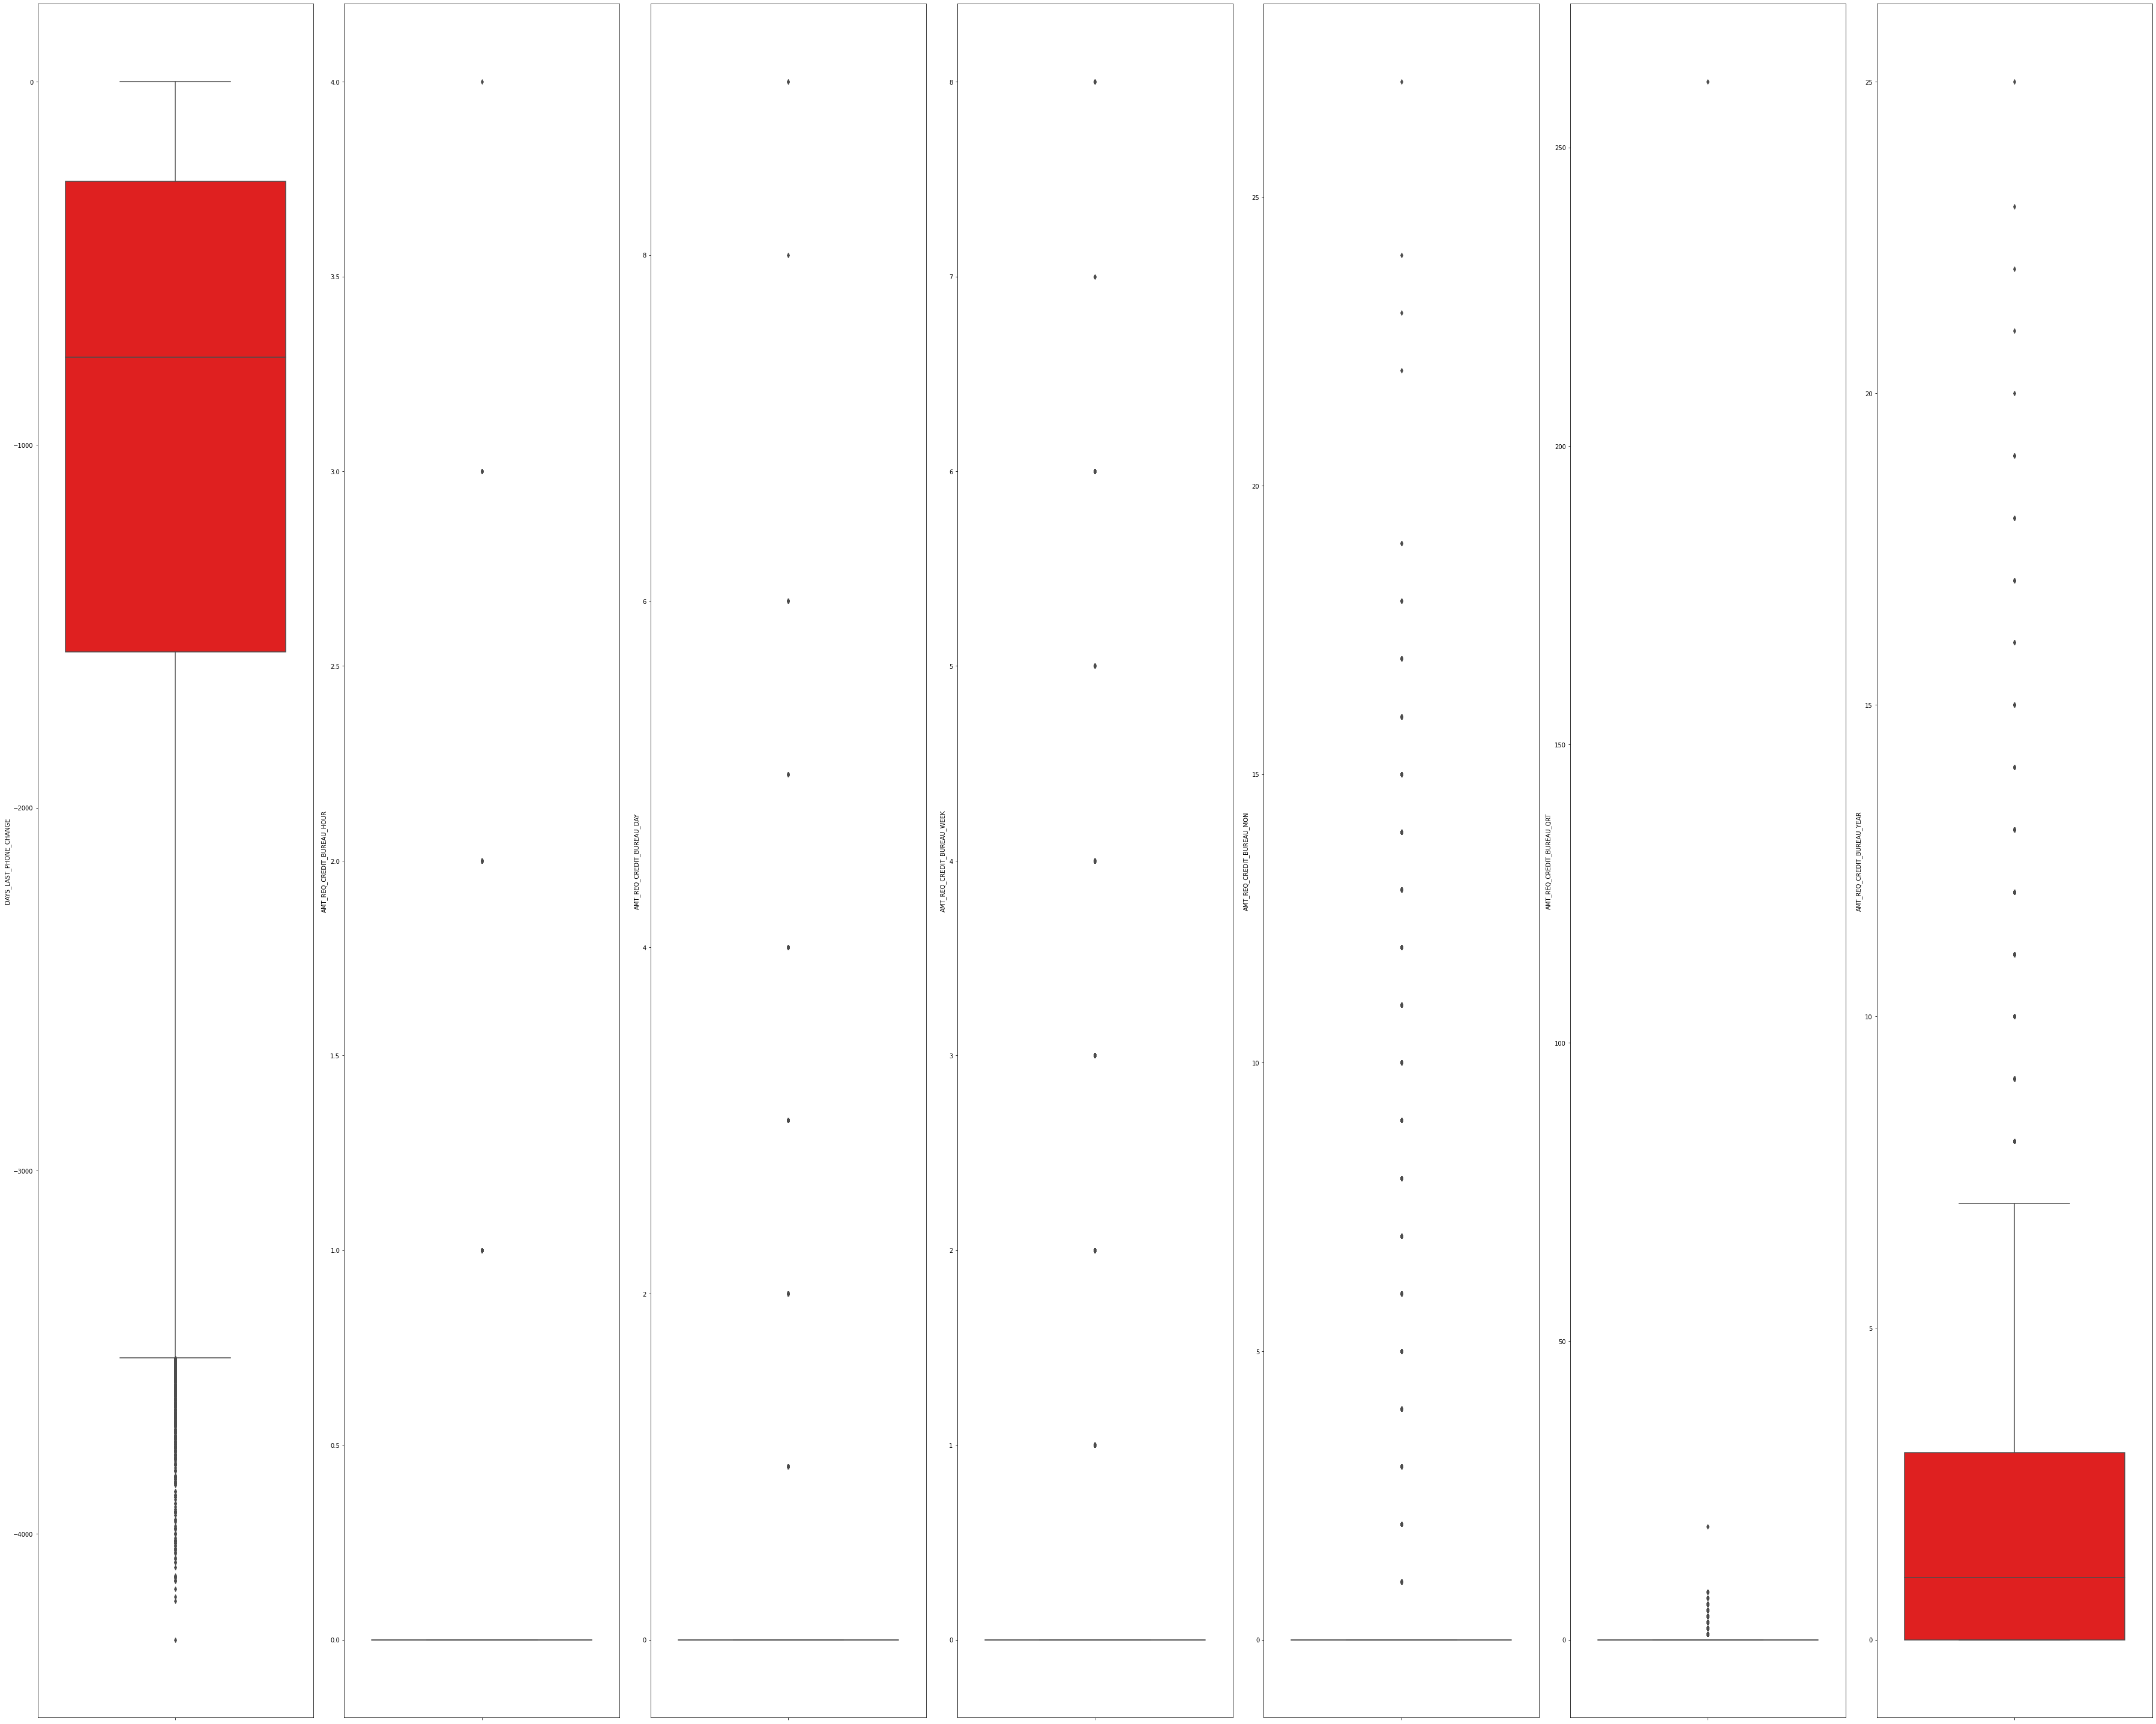

In [ ]:
#Boxplot Continued 
plt.figure(figsize=(50,40))

# plotting
features = c[49:57]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

##Correlation Matrix

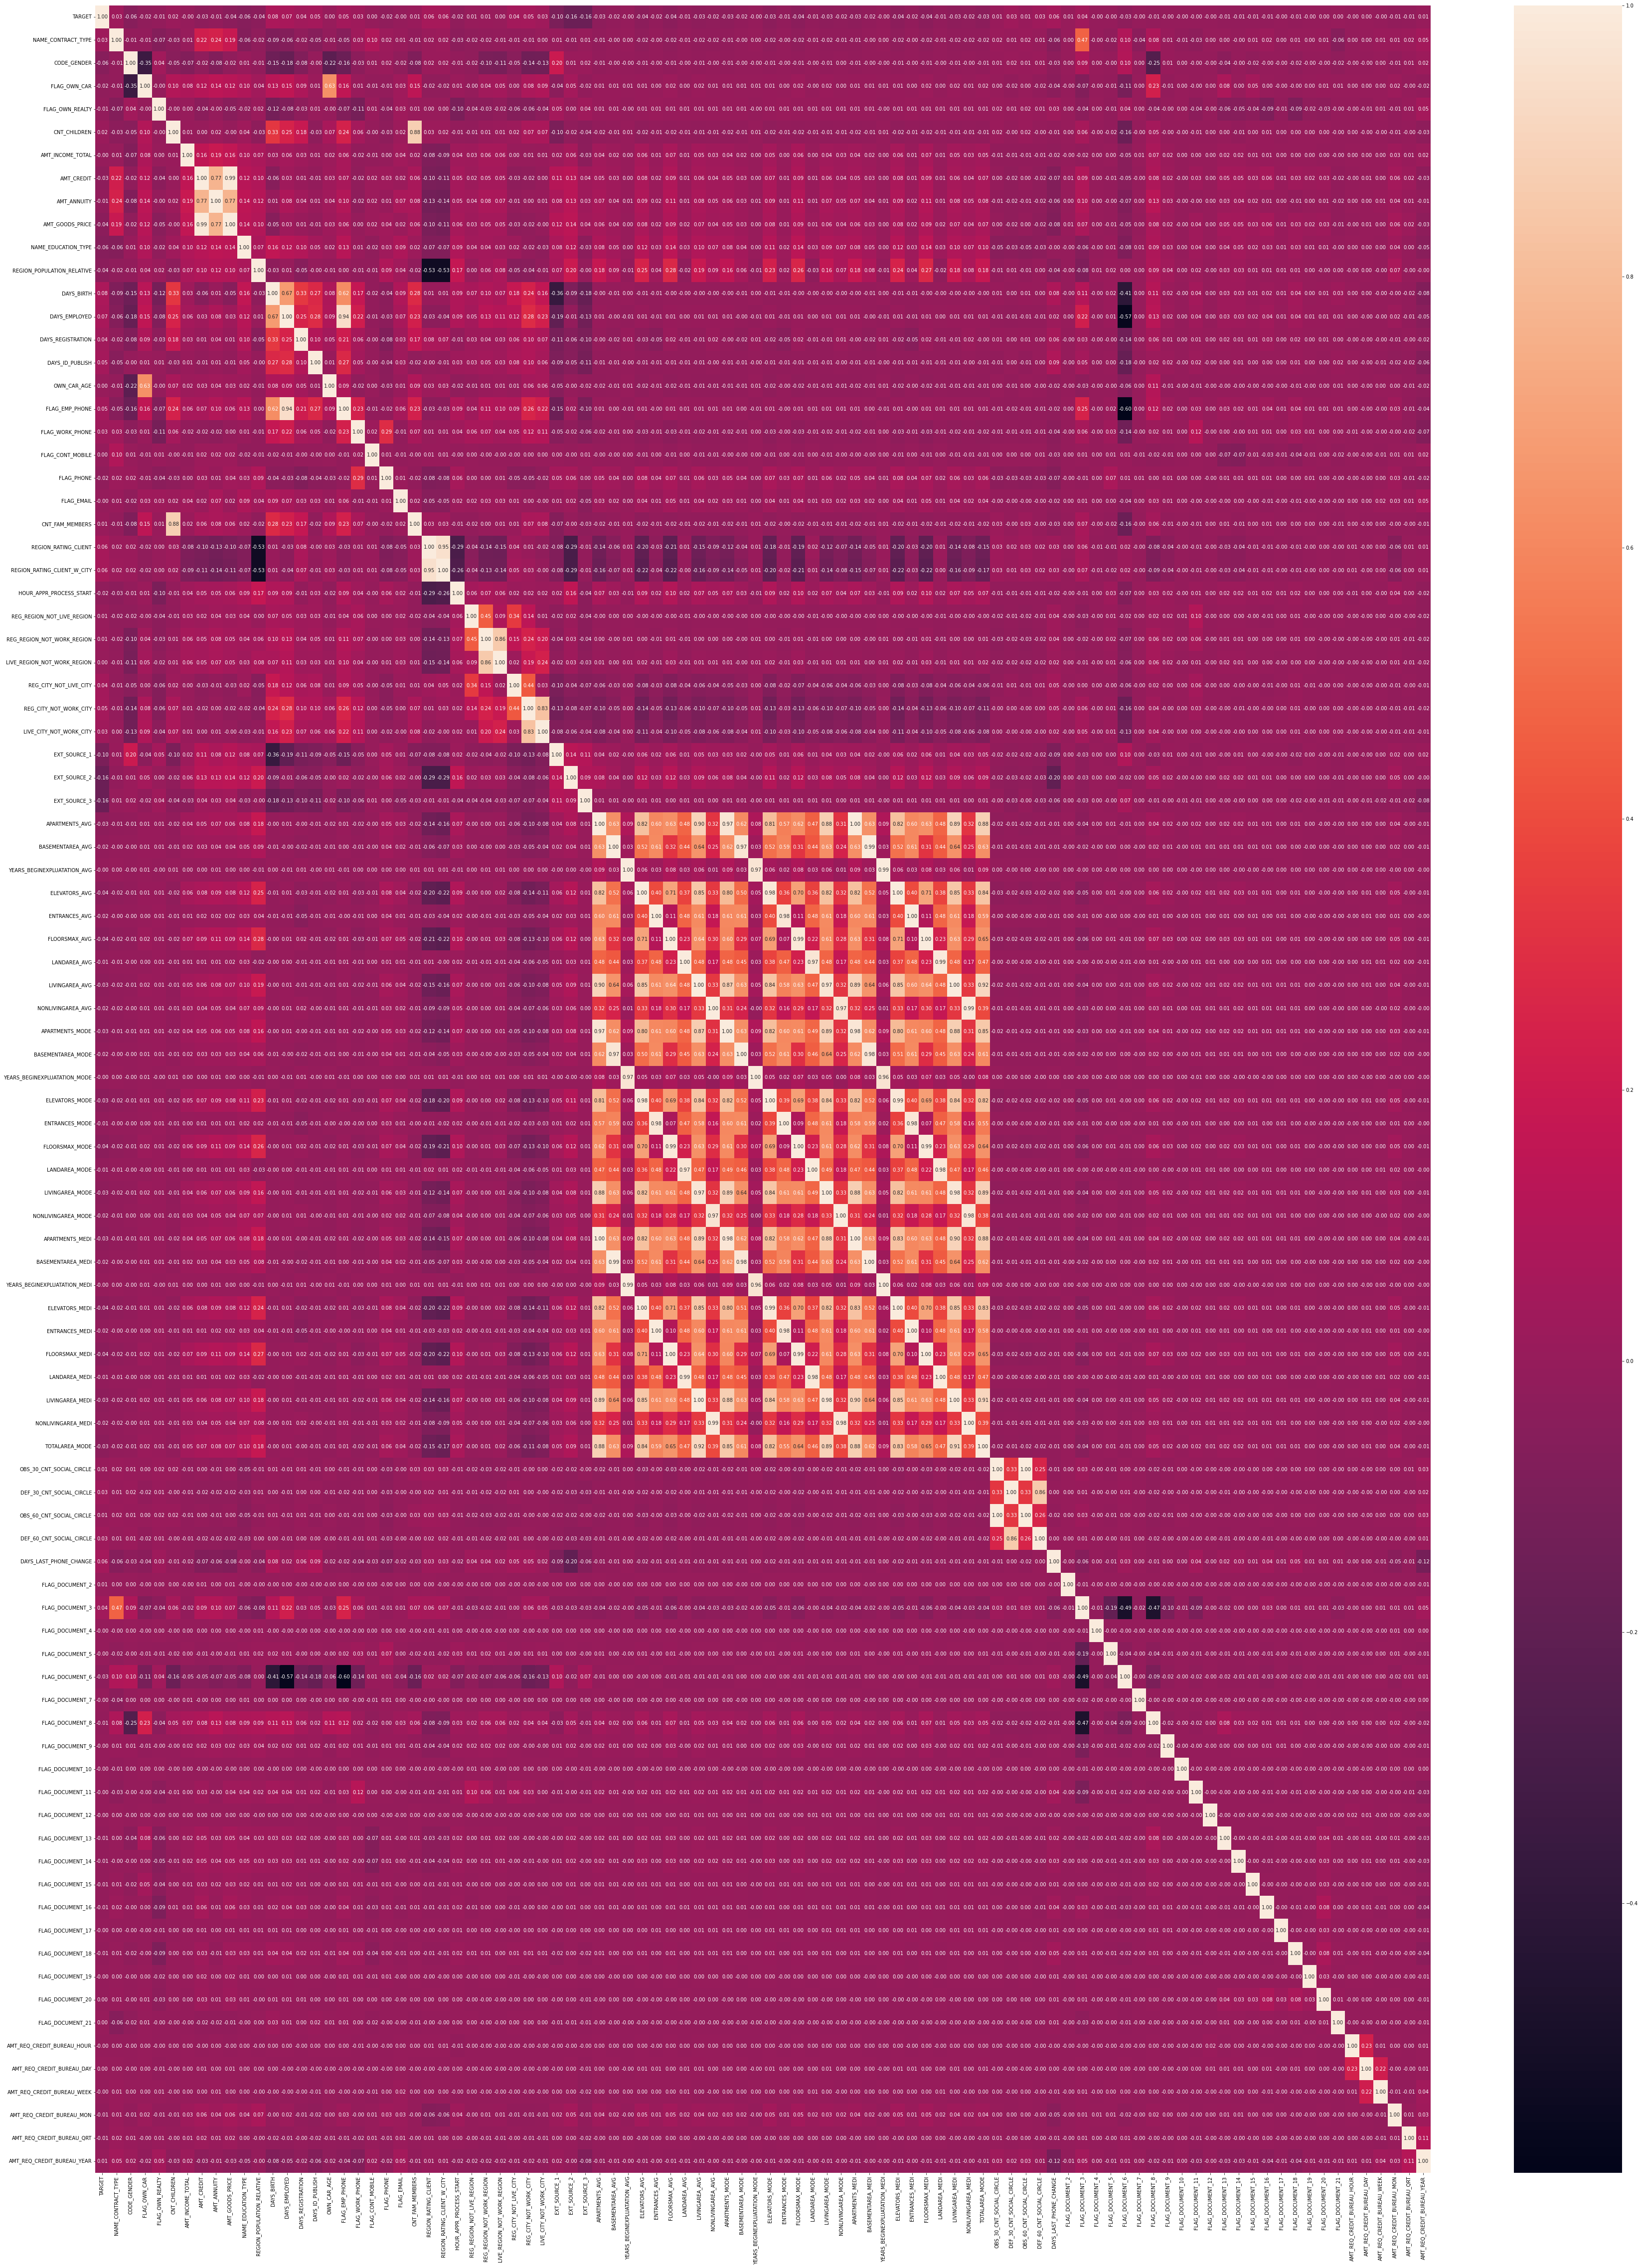

In [ ]:
plt.figure(figsize=(60,80))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

From the correlation matrix above, we could drop some features that has a high correlation value. The columns having high correlation value are: 

1. `CNT_CHILDREN` and `CNT_FAM_MEMBERS` with correlation score of 0.88. Thus, drop `CNT_FAM_MEMBERS`. 
2. `AMT_CREDIT` and `AMT_GOODS_PRICE` with correlation score of 0.99. Thus, drop `AMT_GOODS_PRICE`. 
3. `DAYS_EMPLOYED` and `FLAG_EMP_PHONE` with correlation score of 0.94. Thus, drop `FLAG_EMP_PHONE`. 
4. `REGION_RATING_CLIENT` and `REGION_RATING_CLIENT_W_CITY` with correlation score of 0.95. Thus, drop `REGION_RATING_CLIENT_W_CITY`. 
5. `REG_REGION_NOT_WORK_REGION` and `LIVE_REGION_NOT_WORK_REGION` with correlation score of 0.86. Thus, drop `LIVE_REGION_NOT_WORK_REGION`
6. `REG_CITY_NOT_WORK_CITY` and `LIVE_CITY_NOT_WORK_CITY` with correlation score of 0.83. Thus, drop `LIVE_CITY_NOT_WORK_CITY`. 
7. `DEF_30_CNT_SOCIAL_CIRCLE` and `DEF_60_CNT_SOCIAL_CIRCLE` with correlation score of 0.86. Thus, drop `DEF_30_CNT_SOCIAL_CIRCLE`. 

`APARTMENTS_MEDI` should already represent the normalized score of where the client lives, AVG and MODE value should be dropped. 

In [ ]:
columns_to_drop = ['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 
                   'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE']
for i in columns_missing_above_50_num[0:18] :
  columns_to_drop.append(i)

df = df.drop(columns_to_drop, axis = 1)

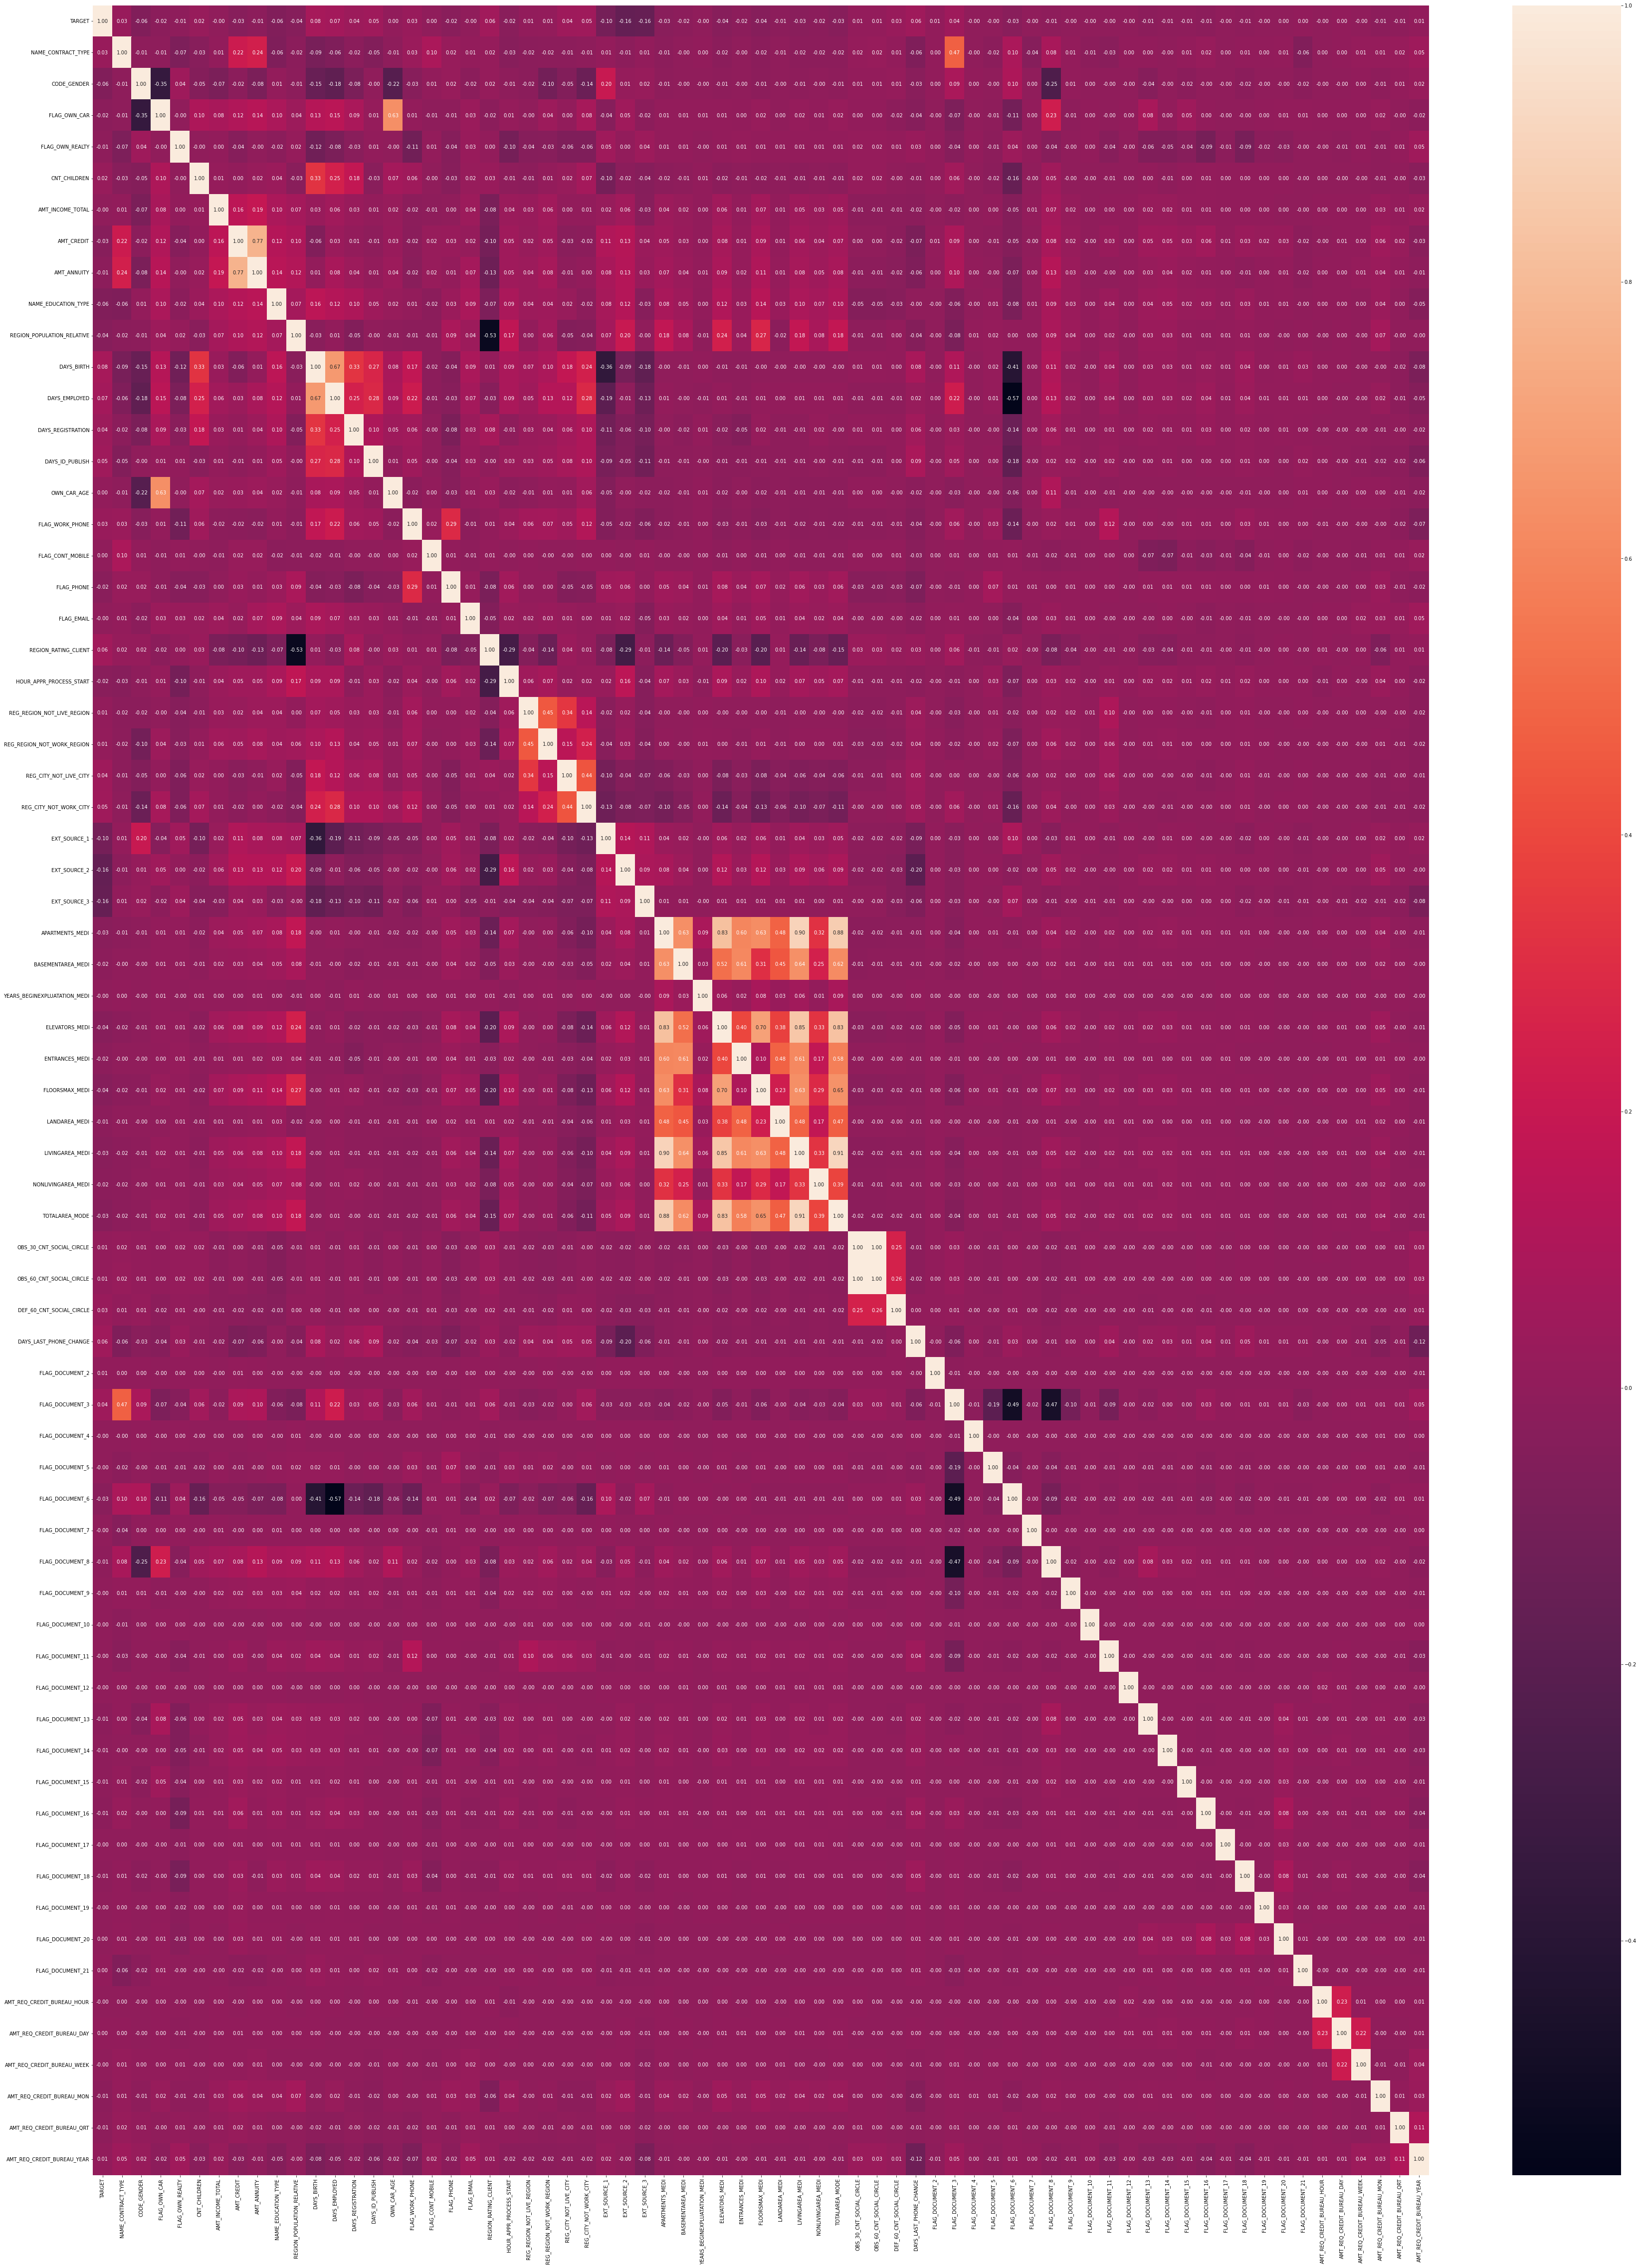

In [ ]:
#Check Correlation Matrix Again 
plt.figure(figsize=(60,80))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Further Correlation Analysis : 
1. `APARTMENTS_MEDI`, `ELEVATORS_MEDI`, `LIVINGAREA_MEDI`, and `TOTALAREA_MODE` has a correlation value greater than 0,8. Thus, `APARTMENTS_MEDI` should be kept because it is already represent the size of the apartment.  

In [ ]:
df = df.drop(['ELEVATORS_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE'], axis = 1)

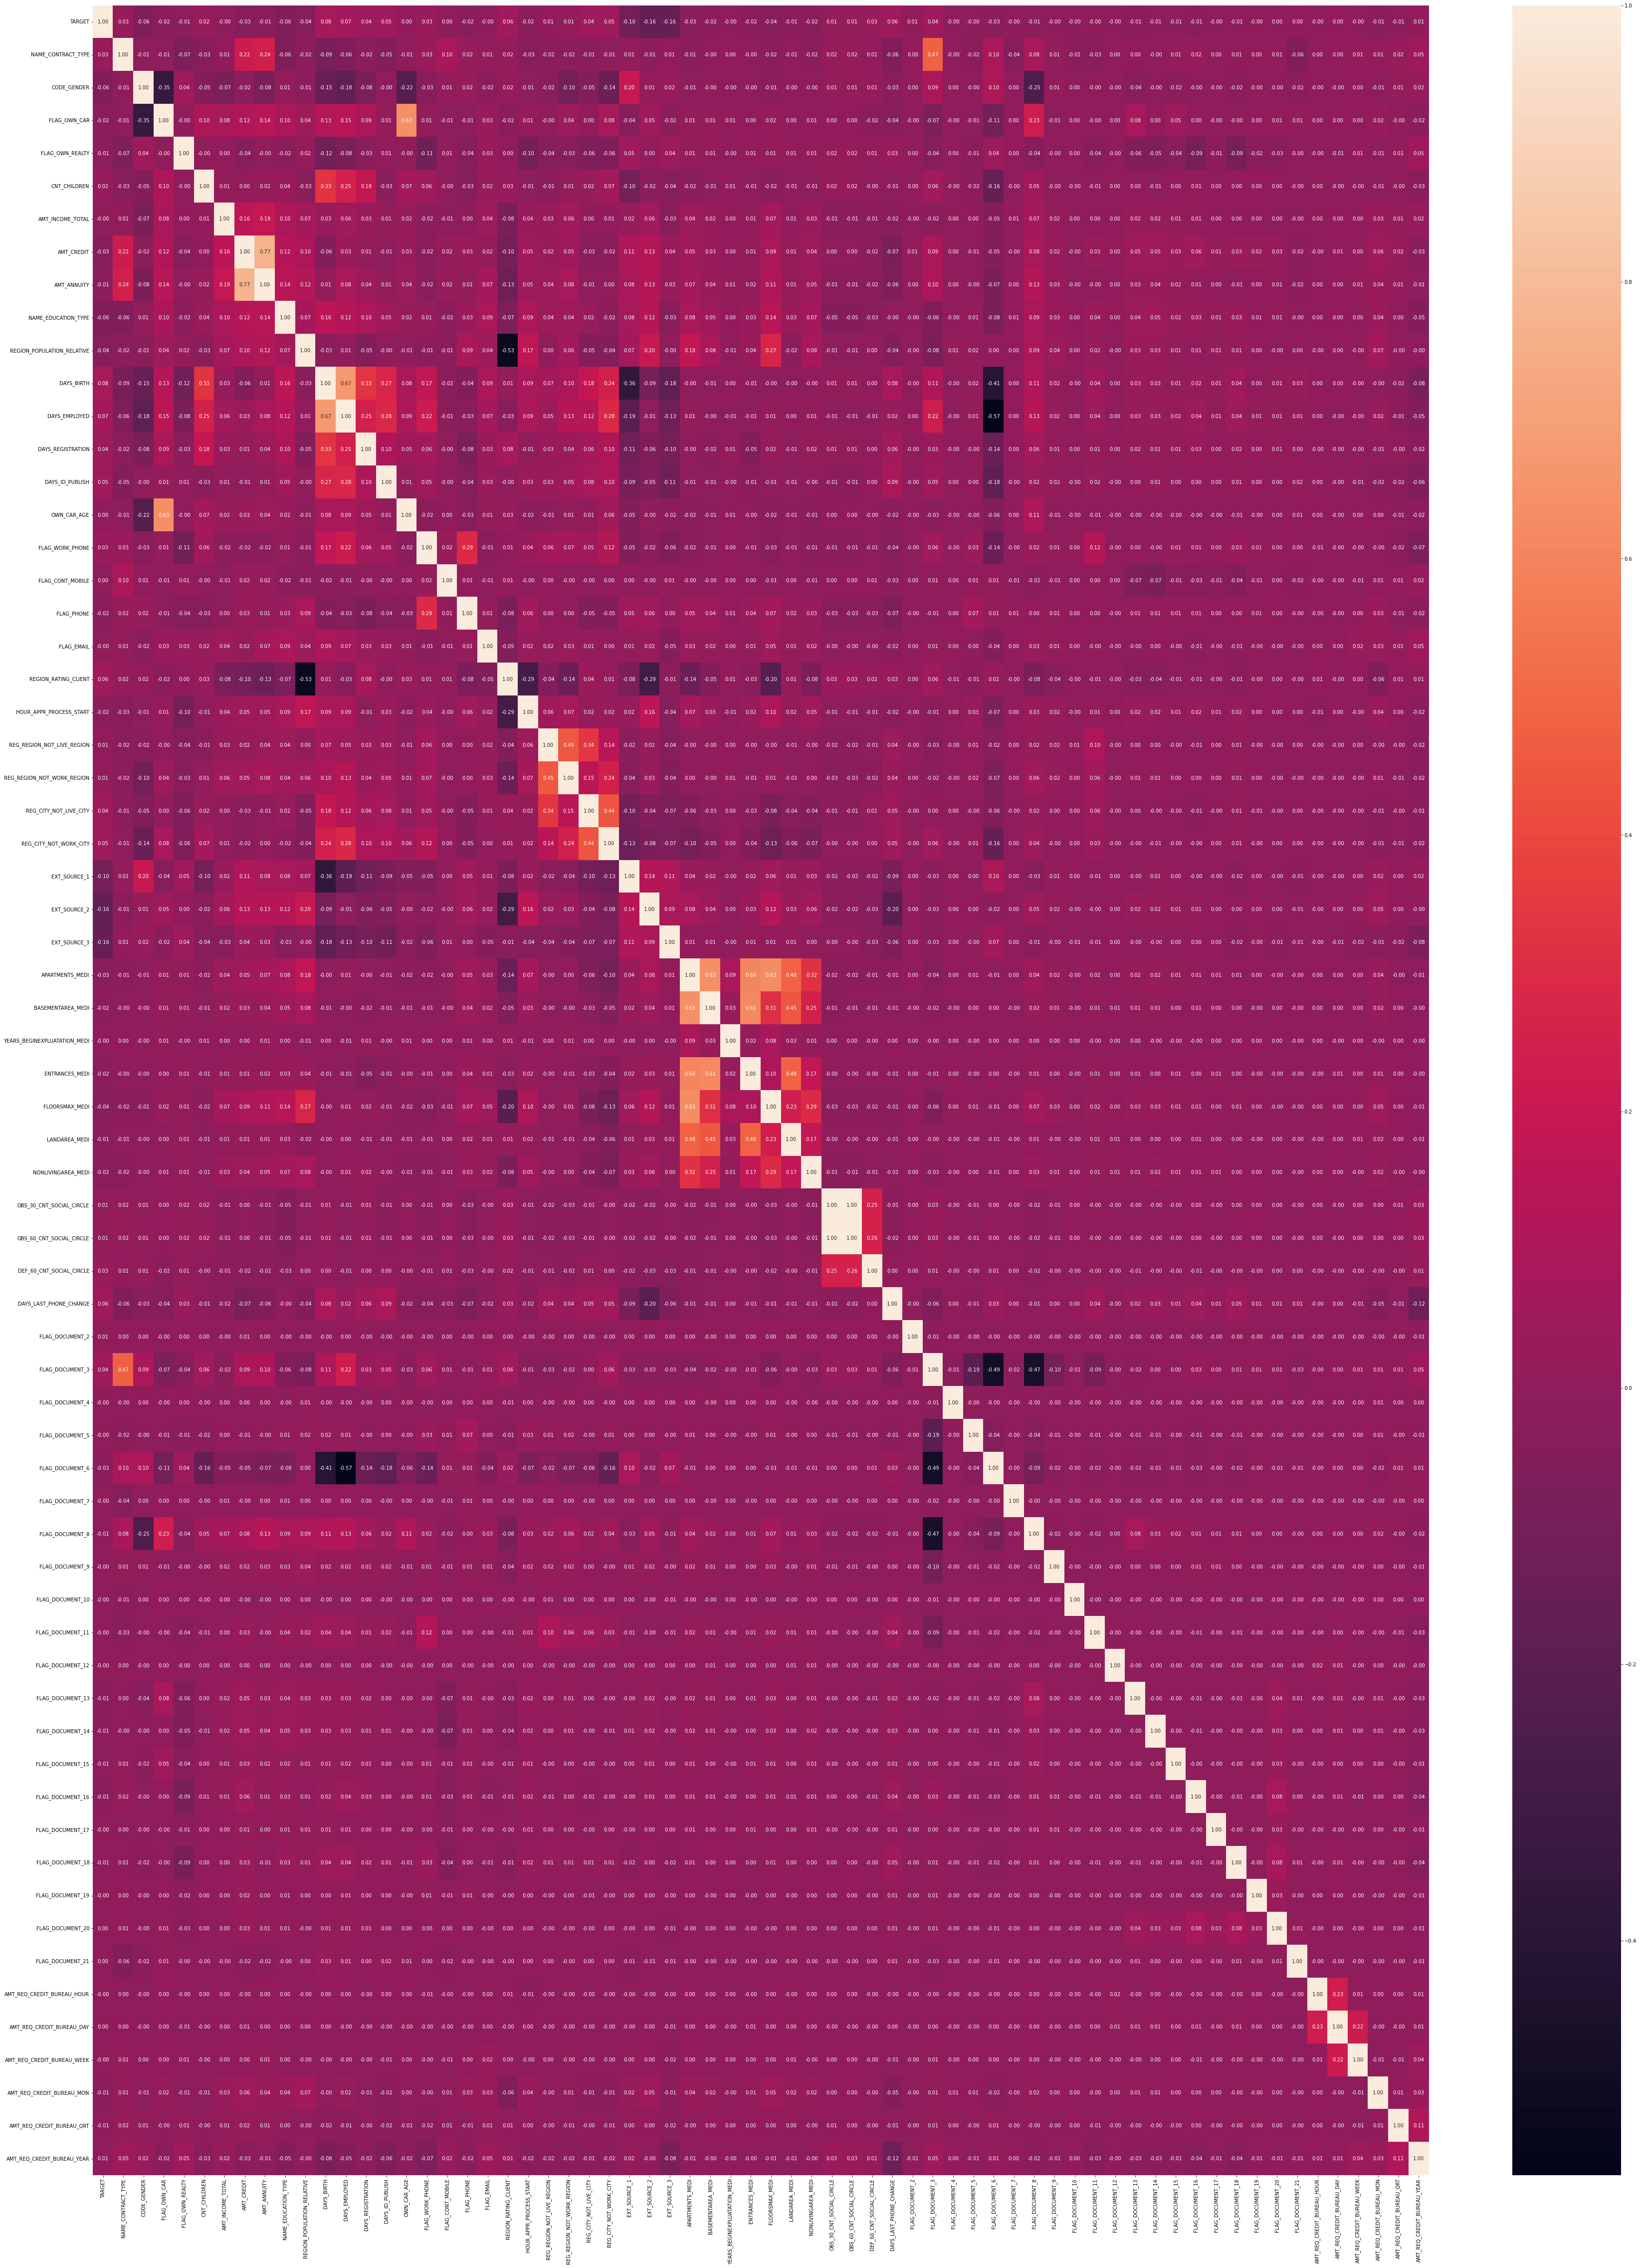

In [ ]:
#Final Correlation Matrix 
plt.figure(figsize=(60,80))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
df.shape

(305541, 73)

## Univariate and Multivariate Analysis

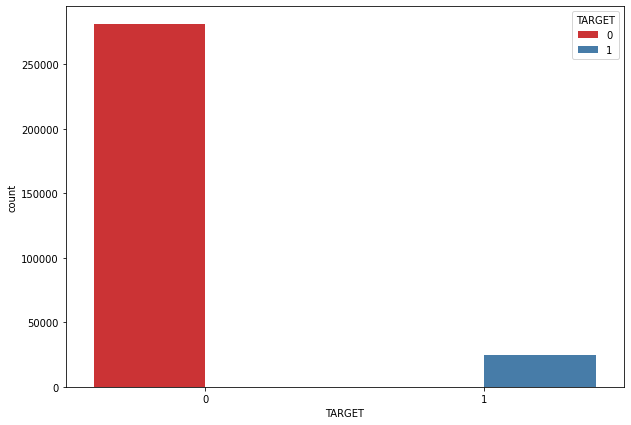

In [ ]:
#Target Value Counts 
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=df, hue='TARGET',palette="Set1")

Conclusion :    
The data is very large and very imbalanced.

Question: 

**What type of customer job that would likely have bad payment behaviour?**

In [ ]:
Job_bad = (df
            .groupby('NAME_INCOME_TYPE')
            .agg(num_bad=('TARGET','sum'))
            .reset_index()
            .sort_values('num_bad',ascending=False)
            )
Job_bad

NAME_INCOME_TYPE  num_bad
7               Working    15157
1  Commercial associate     5341
3             Pensioner     2966
4         State servant     1242
6            Unemployed        8
2       Maternity leave        2
0           Businessman        0
5               Student        0

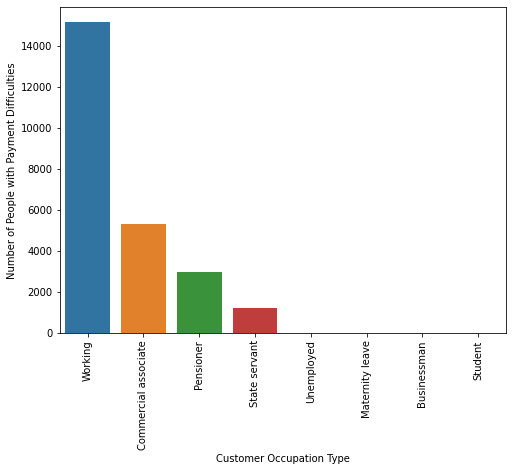

In [ ]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=Job_bad, x='NAME_INCOME_TYPE', y='num_bad')
plt.xticks(rotation=90)
plt.xlabel('Customer Occupation Type')
plt.ylabel('Number of People with Payment Difficulties')
plt.show()

Question: 

**How big usually the amount of credit requested which the customer tends to have a bad payment behaviour?**

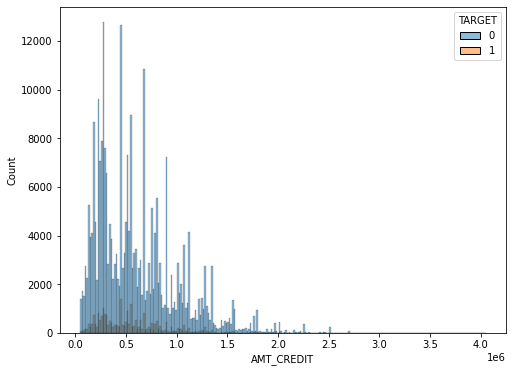

In [ ]:
#plot customer income affect on credit payment behaviour
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="AMT_CREDIT", hue="TARGET")

Question: 

**What type of Job that is requested a higher amount of credit?**

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

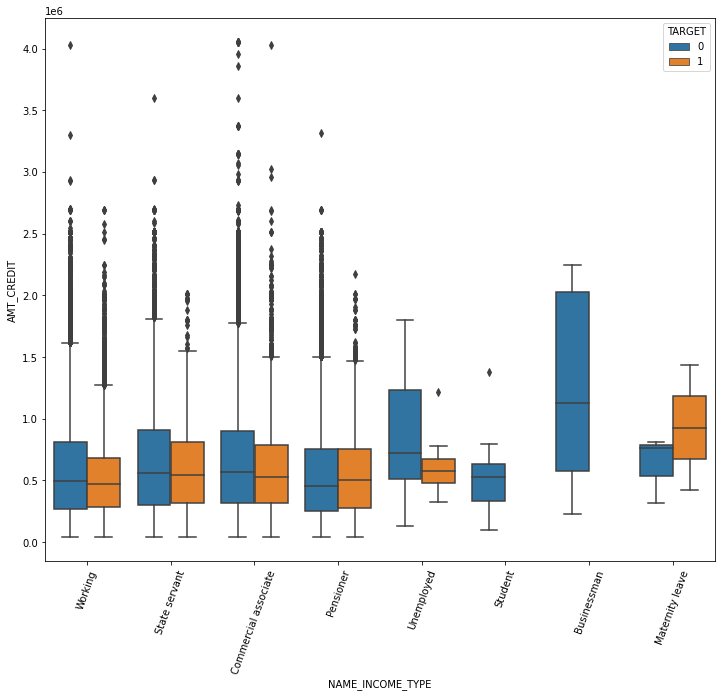

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=df,hue='TARGET')
plt.xticks(rotation=70)

Question: 

**Does external score for customer correlated with customer payment difficulties?**

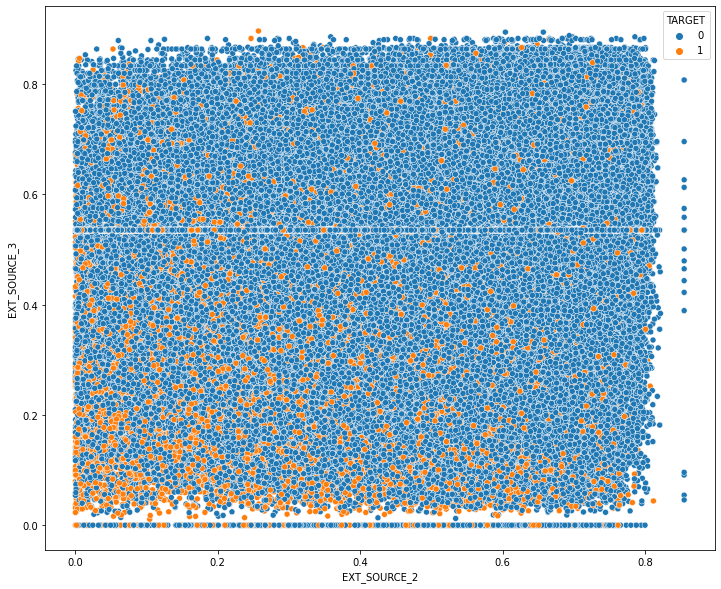

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x="EXT_SOURCE_2", y="EXT_SOURCE_3", hue="TARGET")

Question:

**Does amount credit requested and total income has a certain effect on payment difficulties ?**

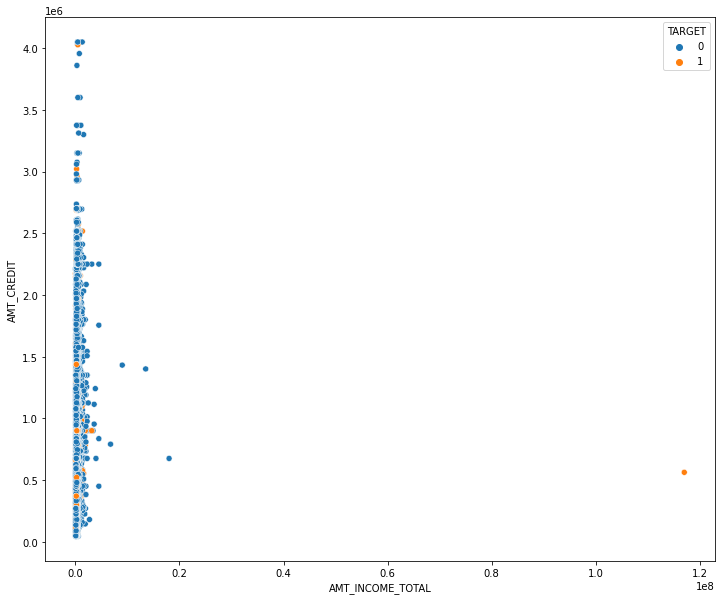

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET")

#Data Transformation

##Drop Object Data

In [ ]:
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
df_num = df.drop(df.select_dtypes('object').columns.tolist(), axis = 1)

In [ ]:
df_num.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'LANDAREA_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG

##Merge Encoded Data

In [ ]:
df_model = pd.concat([df_num, onehot_categorical], axis=1)

In [ ]:
df_model.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            0             0                1   
1       0                   1            1             0                0   
2       0                   0            0             1                1   
3       0                   1            1             0                1   
4       0                   1            0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                    1                    0.018801       -9461           -637   
1                    4                    0.003541      -16765          -1188   
2                    1                    0.010032      -19046           -225   
3                    1                    0.008019      -19005          -3039   
4                    1                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  \
0            -3648.0            -2120          0.0                0   
1            -1186.0             -291          0.0                0   
2            -4260.0            -2531         26.0                1   
3            -9833.0            -2437          0.0                0   
4            -4311.0            -3458          0.0                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  \
0                 1           1           0                     2   
1                 1           1           0                     1   
2                 1           1           0                     2   
3                 1           0           0                     2   
4                 1           0           0                     2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_MEDI  \
0      0.083037      0.262949      0.139376           0.0250   
1      0.311267      0.622246      0.535276           0.0968   
2      0.505777      0.555912      0.729567           0.0864   
3      0.505777      0.650442      0.535276           0.0864   
4      0.505777      0.322738      0.535276           0.0864   

   BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  ENTRANCES_MEDI  \
0             0.0369                        0.9722          0.0690   
1             0.0529                        0.9851          0.0345   
2             0.0758                        0.9816          0.1379   
3             0.0758                        0.9816          0.1379   
4             0.0758                        0.9816          0.1379   

   FLOORSMAX_MEDI  LANDAREA_MEDI  NONLIVINGAREA_MEDI  \
0          0.0833         0.0375              0.0000   
1          0.2917         0.0132              0.0100   
2          0.1667         0.

#Modelling (Feature Selection)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_model.drop('TARGET', axis =1)
Y = df_model['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X.describe()

NAME_CONTRACT_TYPE    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count       305541.000000  305541.000000  305541.000000    305541.000000   
mean             0.908618       0.658170       0.340488         0.693458   
std              0.288152       0.474324       0.473874         0.461058   
min              0.000000       0.000000       0.000000         0.000000   
25%              1.000000       0.000000       0.000000         0.000000   
50%              1.000000       1.000000       0.000000         1.000000   
75%              1.000000       1.000000       1.000000         1.000000   
max              1.000000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  305541.000000      3.055410e+05  3.055410e+05  305541.000000   
mean        0.417086      1.687139e+05  6.000801e+05   27144.709314   
std         0.722235      2.375894e+05  4.027073e+05   14481.482802   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16573.500000   
50%         0.000000      1.485000e+05  5.175000e+05   24939.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34636.500000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count        305541.000000               305541.000000  305541.000000   
mean              1.783427                    0.020847  -16038.658697   
std               1.310859                    0.013810    4362.959548   
min               0.000000                    0.000290  -25229.000000   
25%               1.000000                    0.010006  -19681.000000   
50%               1.000000                    0.018850  -15752.000000   
75%               3.000000                    0.028663  -12415.000000   
max               4.000000                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  \
count  305541.000000      305541.000000    305541.000000  305541.000000   
mean    -5181.199433       -4985.056412     -2994.772623       4.105714   
std      6331.261410        3522.211378      1509.243287       9.005412   
min    -17912.000000      -24672.000000     -7197.000000       0.000000   
25%     -5709.000000       -7477.000000     -4299.000000       0.000000   
50%     -2220.000000       -4503.000000     -3255.000000       0.000000   
75%      -933.000000       -2009.000000     -1721.000000       5.000000   
max         0.000000           0.000000         0.000000      91.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    305541.000000     305541.000000  305541.000000  305541.000000   
mean          0.199528          0.998148       0.281147       0.056798   
std           0.399646          0.043000       0.449560       0.231456   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
count         305541.000000            305541.000000   
mean               2.053142                12.061134   
std                0.508880                 3.265666   
min                1.000000                 0.000000   
25%                2.000000                10.000000   
50%                2.000000                12.000000   
75%                2.000000                14.000000   
max                3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               305541.000000               305541.000000   
mean                     0.015144             

##Model Training and Evaluation

In [ ]:
#Cross Validation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

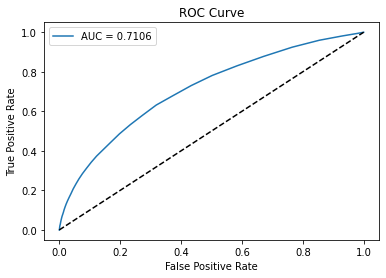

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

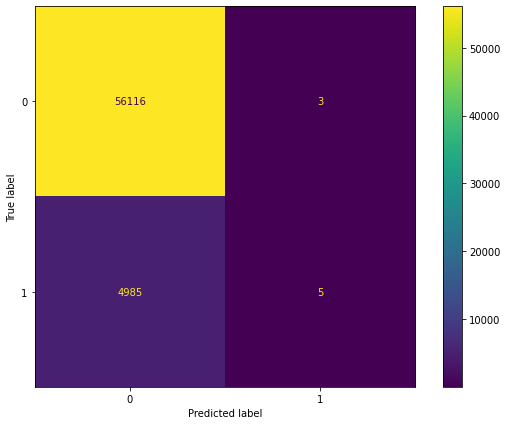

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
target_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, target_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot(ax=ax)
plt.show()

##Feature Selection/Feature Importance

In [ ]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

feature    importance
26                               EXT_SOURCE_2  6.381867e-02
27                               EXT_SOURCE_3  5.838479e-02
10                                 DAYS_BIRTH  4.472670e-02
13                            DAYS_ID_PUBLISH  4.410304e-02
12                          DAYS_REGISTRATION  4.355317e-02
7                                 AMT_ANNUITY  4.095797e-02
11                              DAYS_EMPLOYED  4.086846e-02
38                     DAYS_LAST_PHONE_CHANGE  3.916150e-02
6                                  AMT_CREDIT  3.896473e-02
9                  REGION_POPULATION_RELATIVE  3.406998e-02
5                            AMT_INCOME_TOTAL  3.348408e-02
25                               EXT_SOURCE_1  3.212962e-02
20                    HOUR_APPR_PROCESS_START  2.960699e-02
64                 AMT_REQ_CREDIT_BUREAU_YEAR  2.087056e-02
30               YEARS_BEGINEXPLUATATION_MEDI  1.959239e-02
28                            APARTMENTS_MEDI  1.935070e-02
33                              LANDAREA_MEDI  1.749305e-02
29                          BASEMENTAREA_MEDI  1.715022e-02
35                   OBS_30_CNT_SOCIAL_CIRCLE  1.708271e-02
36                   OBS_60_CNT_SOCIAL_CIRCLE  1.689154e-02
14                                OWN_CAR_AGE  1.522926e-02
34                         NONLIVINGAREA_MEDI  1.445995e-02
31                             ENTRANCES_MEDI  1.209016e-02
4                                CNT_CHILDREN  1.105972e-02
32                             FLOORSMAX_MEDI  9.769298e-03
8                         NAME_EDUCATION_TYPE  8.560573e-03
19                       REGION_RATING_CLIENT  7.821047e-03
63                  AMT_REQ_CREDIT_BUREAU_QRT  7.781242e-03
3                             FLAG_OWN_REALTY  7.201258e-03
62                  AMT_REQ_CREDIT_BUREAU_MON  6.869229e-03
78                 NAME_FAMILY_STATUS_Married  6.672926e-03
37                   DEF_60_CNT_SOCIAL_CIRCLE  6.484005e-03
1                                 CODE_GENDER  6.440525e-03
17                                 FLAG_PHONE  6.426805e-03
91         WEEKDAY_APPR_PROCESS_START_TUESDAY  6.053565e-03
97   ORGANIZATION_TYPE_Business Entity Type 3  5.939193e-03
15                            FLAG_WORK_PHONE  5.909643e-03
92       WEEKDAY_APPR_PROCESS_START_WEDNESDAY  5.871726e-03
90        WEEKDAY_APPR_PROCESS_START_THURSDAY  5.769780e-03
87          WEEKDAY_APPR_PROCESS_START_MONDAY  5.526394e-03
70              NAME_TYPE_SUITE_Unaccompanied  5.364983e-03
134           ORGANIZATION_TYPE_Self-employed  5.206353e-03
24                     REG_CITY_NOT_WORK_CITY  5.189539e-03
77                   NAME_INCOME_TYPE_Working  5.020805e-03
80    NAME_FAMILY_STATUS_Single / not married  4.990881e-03
2                                FLAG_OWN_CAR  4.894312e-03
40                            FLAG_DOCUMENT_3  4.890700e-03
65                     NAME_TYPE_SUITE_Family  4.622610e-03
88        WEEKDAY_APPR_PROCESS_START_SATURDAY  4.483202e-03
71      NAME_INCOME_TYPE_Commercial associate  4.291731e-03
23                     REG_CITY_NOT_LIVE_CITY  4.224781e-03
153                  WALLSMATERIAL_MODE_Panel  4.198371e-03
82        NAME_HOUSING_TYPE_House / apartment  4.097185e-03
154           WALLSMATERIAL_MODE_Stone, brick  4.009835e-03
79               NAME_FAMILY_STATUS_Separated  3.402642e-03
89          WEEKDAY_APPR_PROCESS_START_SUNDAY  3.350685e-03
125                   ORGANIZATION_TYPE_Other  3.145860e-03
86             NAME_HOUSING_TYPE_With parents  3.037182e-03
18                                 FLAG_EMAIL  3.021241e-03
22                 REG_REGION_NOT_WORK_REGION  2.649380e-03
45                            FLAG_DOCUMENT_8  2.606381e-03
96   ORGANIZATION_TYPE_Business Entity Type 2  2.569617e-03
99             ORGANIZATION_TYPE_Construction  2.549423e-03
69            NAME_TYPE_SUITE_Spouse, partner  2.523820e-03
61                 AMT_REQ_CREDIT_BUREAU_WEEK  2.417912e-03
143           ORGANIZATION_TYPE_Trade: type 7  2.387832e-03
0                 

<BarContainer object of 156 artists>

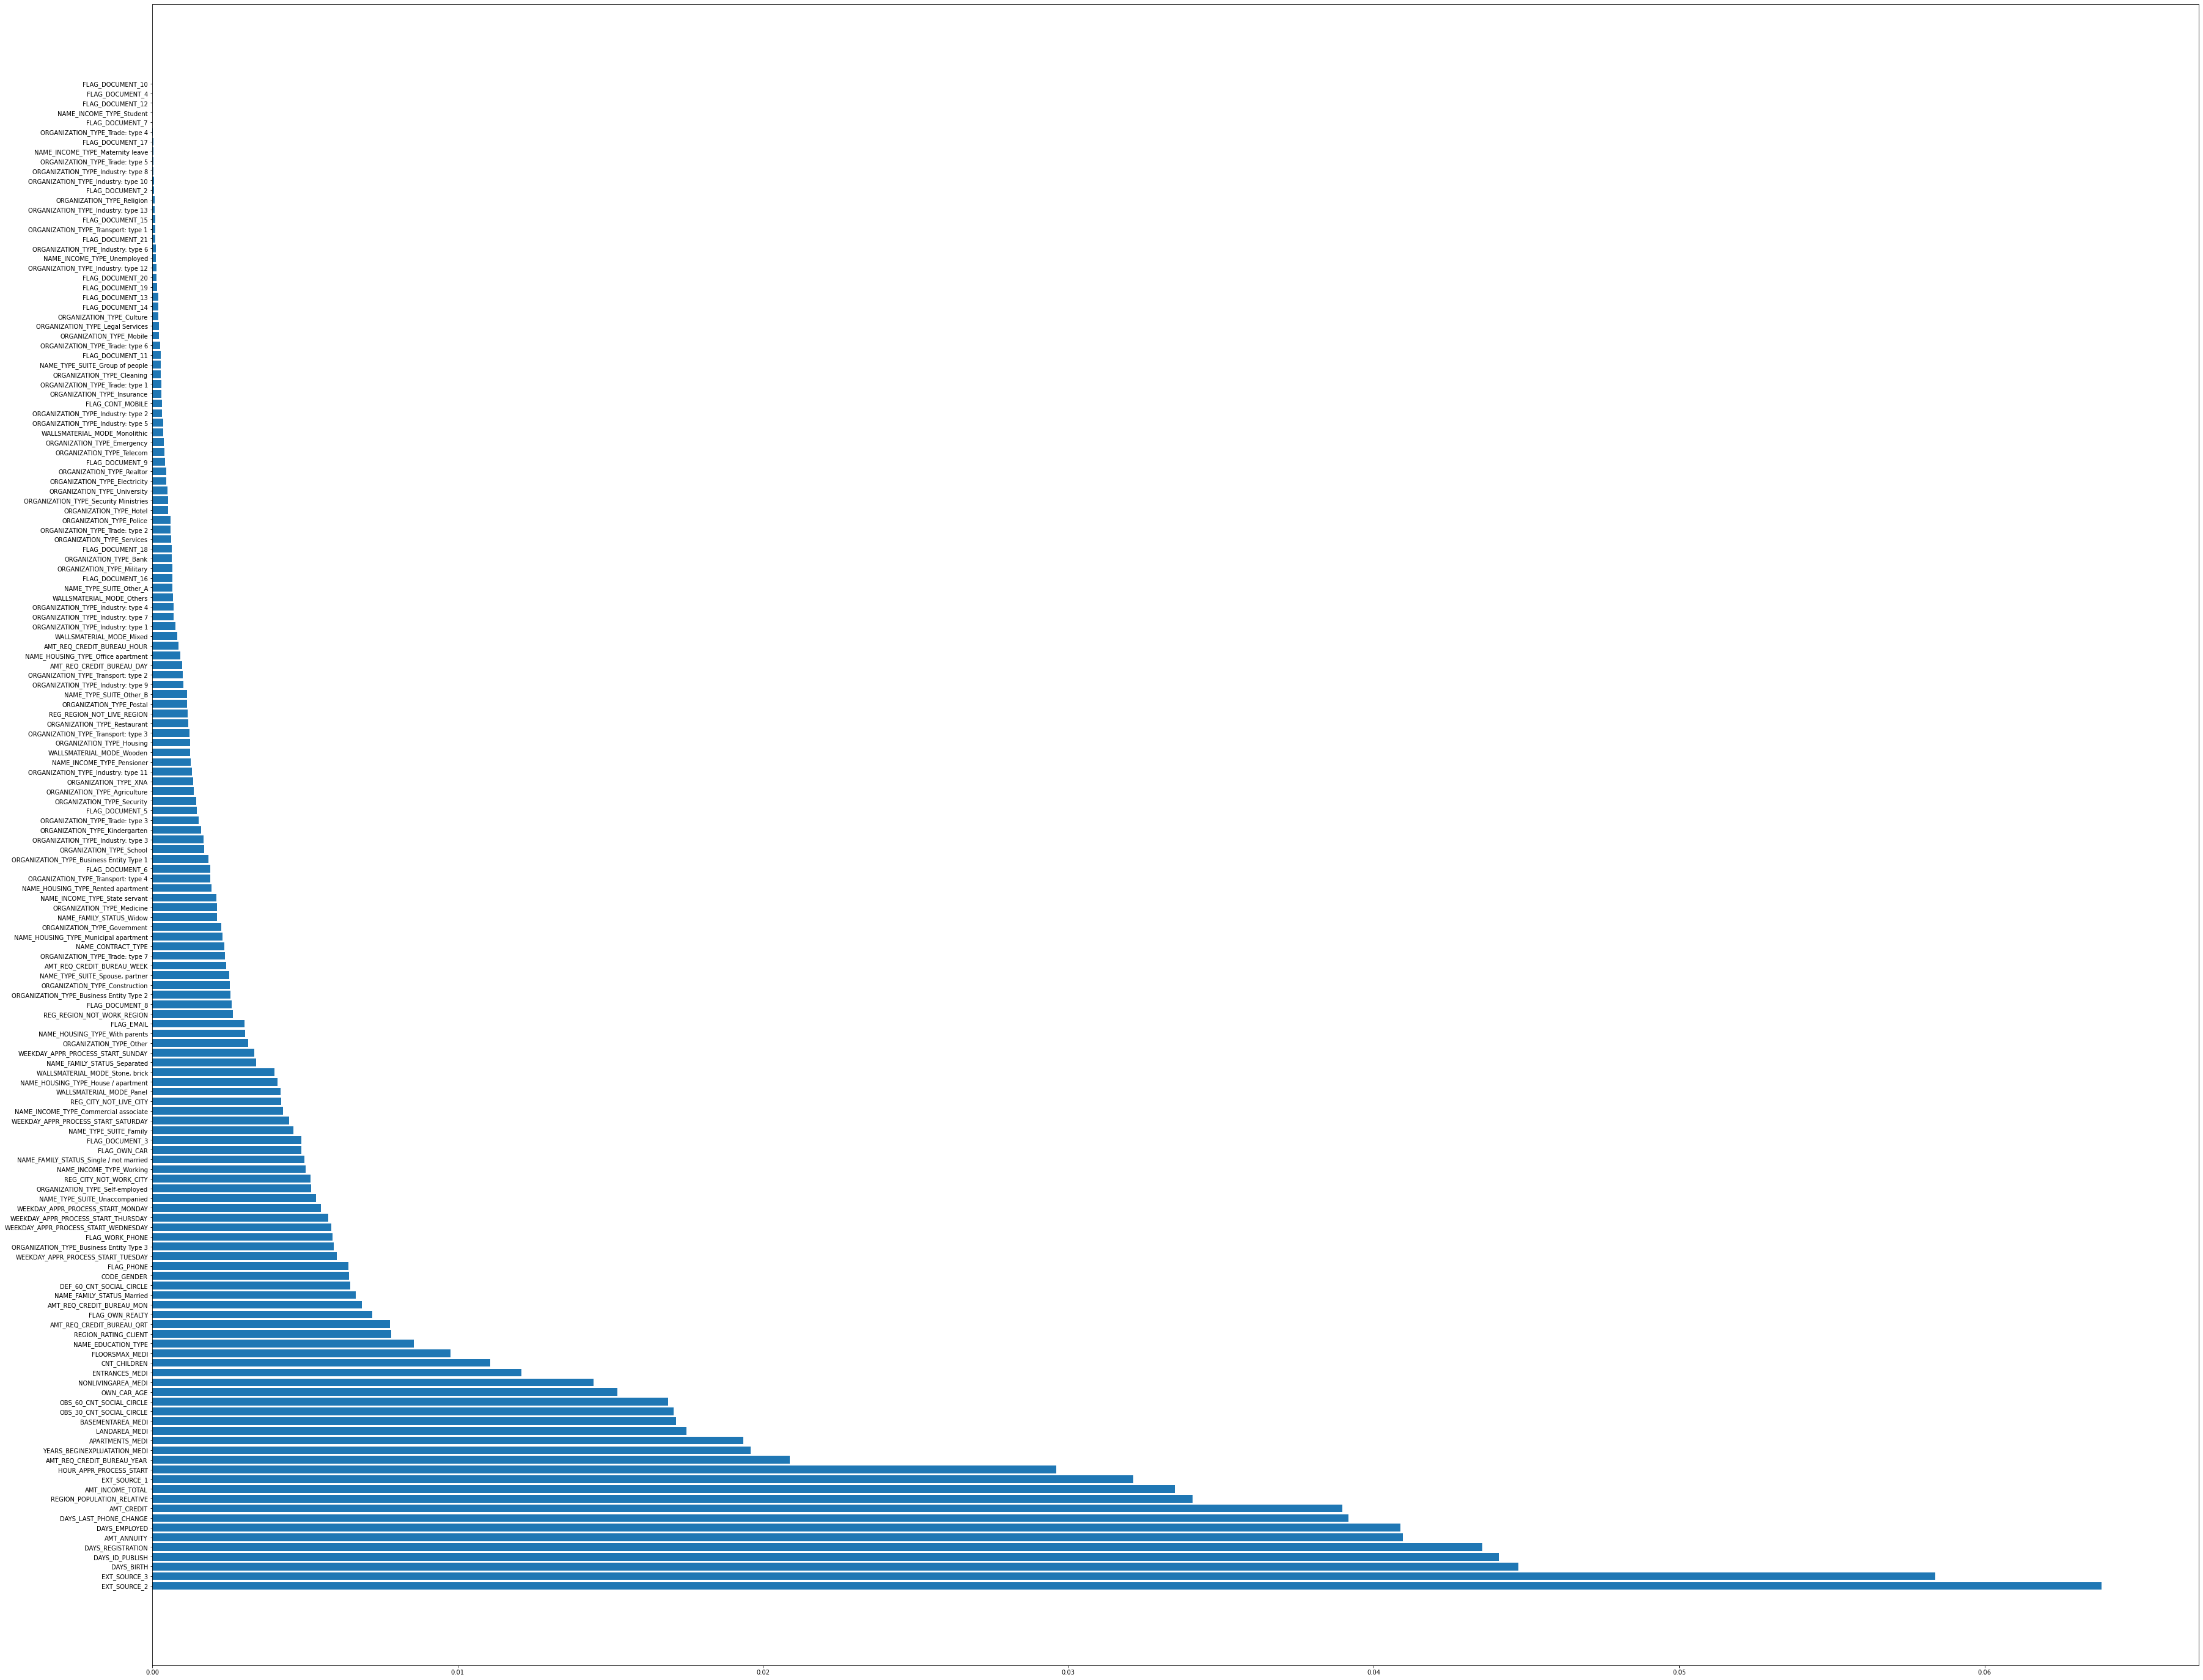

In [ ]:
top_feature = df_all_features
plt.figure(figsize=(60,50))
plt.barh(top_feature['feature'].values,top_feature['importance'].values )

<BarContainer object of 15 artists>

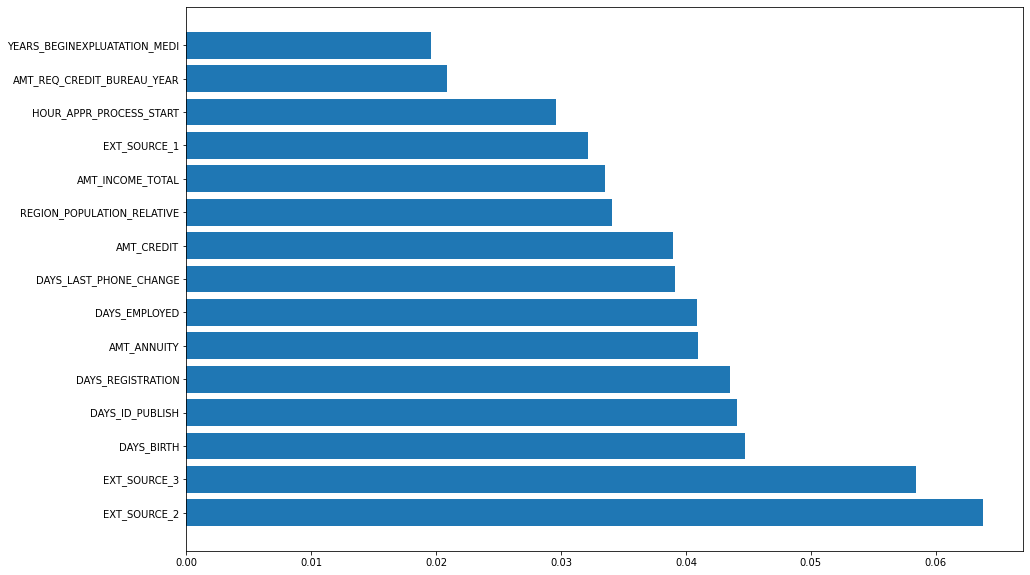

In [ ]:
top15_feature = df_all_features.head(15)
plt.figure(figsize=(15,10))
plt.barh(top15_feature['feature'].values,top15_feature['importance'].values )

In [ ]:
column_for_model = top15_feature['feature'].values.tolist()
column_for_model 

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_1',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BEGINEXPLUATATION_MEDI']

In [ ]:
df_model.shape

(305541, 157)

##Download Data for Model Tuning

In [ ]:
df_model_improve = df_model[column_for_model + ['TARGET']]

In [ ]:
df_model_improve.head()

EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  DAYS_ID_PUBLISH  DAYS_REGISTRATION  \
0      0.262949      0.139376       -9461            -2120            -3648.0   
1      0.622246      0.535276      -16765             -291            -1186.0   
2      0.555912      0.729567      -19046            -2531            -4260.0   
3      0.650442      0.535276      -19005            -2437            -9833.0   
4      0.322738      0.535276      -19932            -3458            -4311.0   

   AMT_ANNUITY  DAYS_EMPLOYED  DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  \
0      24700.5           -637                 -1134.0    406597.5   
1      35698.5          -1188                  -828.0   1293502.5   
2       6750.0           -225                  -815.0    135000.0   
3      29686.5          -3039                  -617.0    312682.5   
4      21865.5          -3038                 -1106.0    513000.0   

   REGION_POPULATION_RELATIVE  AMT_INCOME_TOTAL  EXT_SOURCE_1  \
0                    0.018801          202500.0      0.083037   
1                    0.003541          270000.0      0.311267   
2                    0.010032           67500.0      0.505777   
3                    0.008019          135000.0      0.505777   
4                    0.028663          121500.0      0.505777   

   HOUR_APPR_PROCESS_START  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                       10                         1.0   
1                       11                         0.0   
2                        9                         0.0   
3                       17                         0.0   
4                       11                         0.0   

   YEARS_BEGINEXPLUATATION_MEDI  TARGET  
0                        0.9722       1  
1                        0.9851       0  
2                        0.9816       0  
3                        0.9816       0  
4                        0.9816       0

In [ ]:
from google.colab import files
df_model_improve.to_csv('data for model.csv') 
files.download('data for model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Continued on :     
https://colab.research.google.com/drive/1zb0PjyGkKkU5e3GmVW0OcolZYULSRSIH?usp=sharing 